# Исследование установаления параметров недвижимости в г. Санкт-Петербурге.

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Шаг 1. Обзор данных

In [1]:
import pandas as pd

import datetime
import pathlib
from pathlib import Path

In [2]:
try:
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    data_path = Path(pathlib.Path.cwd(), 'datasets', 'bestsellers with categories.csv')

    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    data_path = Path(pathlib.Path.cwd(), 'datasets', 'bestsellers with categories.csv')
    
    data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
print('Информация о датафрейме:')
data.shape

Информация о датафрейме:


(23699, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.head(30)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
13            20   3550000.0       42.80  2017-07-01T00:00:00      2   
14             1   4400000.0       36.00  2016-06-23T00:00:00      1   
15            16   4650000.0       39.00  2017-11-18T00:00:00      1   
16            11   6700000.0       82.00  2017-11-23T00:00:00      3   
17             6   4180000.0       36.00  2016-09-09T00:00:00      1   
18             8   3250000.0       31.00  2017-01-27T00:00:00      1   
19            16  14200000.0      121.00  2019-01-09T00:00:00      3   
20            12   6120000.0       80.00  2017-09-28T00:00:00      3   
21            13   3200000.0       31.60  2018-03-14T00:00:00      1   
22            20   5000000.0       58.00  2017-04-24T00:00:00      2   
23            11   2950000.0       32.00  2016-10-29T00:00:00      1   
24             8   6500000.0       97.20  2015-10-31T00:00:00      2   
25             3   6800000.0       76.00  2015-10-01T00:00:00      2   
26             6   4050000.0       60.00  2017-04-28T00:00:00      4   
27            20   7100000.0       70.00  2017-05-12T00:00:00      3   
28             8   4170000.0       44.00  2017-12-13T00:00:00      1   
29             9   8600000.0      100.00  2016-04-09T00:00:00      3   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70          16.0        51.00      8          NaN   False   
1              NaN          11.0        18.60      1          NaN   False   
2              NaN           5.0        34.30      4          NaN   False   
3              NaN          14.0          NaN      9          NaN   False   
4             3.03          14.0        32.00     13          NaN   False   
5              NaN          12.0        14.40      5          NaN   False   
6              NaN          26.0        10.60      6          NaN   False   
7              NaN          24.0          NaN     22          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
9             2.50           9.0        43.60      7          NaN   False   
10            2.67          12.0        20.30      3          NaN   False   
11             NaN           5.0        31.00      4        False   False   
12             NaN           5.0        30.00      5          NaN   False   
13            2.56           5.0        27.00      5          NaN   False   
14             NaN           6.0        17.00      1          NaN   False   
15             NaN          14.0        20.50      5          NaN   False   
16            3.05           5.0        55.60      1          NaN   False   
17             NaN          17.0        16.50      7          NaN   False   
18            2.50           5.0        19.40      2          NaN   False   
19            2.75          16.0        76.00      8          NaN   False   
20            2.70          27.0        48.00     11          NaN   False   
21             NaN           5.0        16.90      2          NaN   False   


In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>
Судя на пятой строчке проектной работы по установлению параметров и проведению предобработки и исследовательского анализа данных с архивными объявлениями о продаже квартир в г. Санкт-Петербург: мы обнаруживаем, что вместо представления данных в столбцах: 'studio' (наличие квартиры-студии) и 'open_plan' (наличие свободной планировки) обнаруживание пропуск данных в виде многоточия ('...') и неполную картину над параметрами всех объявлений о продаже квартир в г. Санкт-Петербург<br>
<br>
Поэтому чтобы показать полностью все названия столбцов с соответствующими значениями воспользуемся методом: pd.set_option('display.max_columns', None) и чтобы не запутаться с порядковыми номерами индексов применим свойство упорядочивания методом .sort_index(), а для числовых значений из-за главного критерия недвижимости в г. Санкт-Петербург: цены на момент снятия с публикации, т.е. округление до двух цифр после запятой: чтобы привести все числовые данные до двух нулей нужно прописать следующую строку pd.options.display.float_format = '{:,.2f}'.format.<br>
<br>
Ещё в шестой и восьмой строчке данной проектной работы, обнаруживаем неэтическое для программистов название столбца: 'cityCenters_nearest', поэтому сразу меняем это название на 'city_сenters_nearest', не меняя расположения в таблице data.<br>    
</div>

In [7]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
data.sample(10).sort_index()

total_images    last_price  total_area first_day_exposition  rooms  \
360               6  4,990,000.00       57.84  2018-08-22T00:00:00      2   
9202              0  3,500,000.00       38.00  2016-02-01T00:00:00      1   
9824             15  3,990,000.00       39.00  2018-05-21T00:00:00      1   
11807             8  5,500,000.00       79.10  2015-07-08T00:00:00      2   
14453            11 50,000,000.00      162.00  2015-02-11T00:00:00      4   
16867             1  2,700,000.00       37.00  2016-06-07T00:00:00      1   
20668             4 11,200,000.00      100.00  2015-11-27T00:00:00      4   
22121             2  5,400,000.00       93.00  2017-09-08T00:00:00      3   
23206            16  7,690,000.00       69.00  2018-02-01T00:00:00      3   
23351            15  6,299,000.00       54.00  2019-04-23T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
360              2.65         27.00          NaN     13          NaN   False   
9202              NaN         12.00        20.00      6          NaN   False   
9824             2.75         18.00        19.00      8          NaN   False   
11807            2.60          5.00        47.10      2          NaN   False   
14453             NaN         12.00          NaN      8          NaN   False   
16867             NaN          5.00        20.00      1          NaN   False   
20668            3.00          4.00        72.00      3        False   False   
22121            2.70          9.00        53.10      5          NaN   False   
23206            2.50         10.00        43.10      1          NaN   False   
23351            2.60         17.00        28.00     17          NaN   False   

       open_plan  kitchen_area  balcony                   locality_name  \
360        False         10.19     2.00                  посёлок Мурино   
9202       False           NaN     0.00                 Санкт-Петербург   
9824       False         11.00      NaN                         Кудрово   
11807      False         12.90     1.00                         Гатчина   
14453      False           NaN     0.00                 Санкт-Петербург   
16867      False          9.00     2.00  поселок городского типа Вырица   
20668      False         16.00     0.00                 Санкт-Петербург   
22121      False         12.00     3.00                      Всеволожск   
23206      False          8.30     2.00                 Санкт-Петербург   
23351      False         10.50     1.00                 Санкт-Петербург   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
360                 NaN                  NaN               NaN            NaN   
9202          32,899.00            11,354.00              0.00            NaN   
9824                NaN                  NaN               NaN            NaN   
11807               NaN                  NaN               NaN            NaN   
14453         25,586.00             6,689.00              0.00            NaN   
16867               NaN                  NaN               NaN            NaN   
20668         22,286.00             1,122.00              0.00            NaN   
22121               NaN                  NaN               NaN            NaN   
23206         36,592.00            12,113.00              0.00            NaN   
23351         25,360.00            14,749.00              0.00            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
360                 NaN            NaN            60.00  
9202               0.00            NaN           229.00  
9824                NaN            NaN           169.00  
11807               NaN            NaN           366.00  
14453              0.00            NaN           535.00  
16867               NaN            NaN           141.00  
20668              2.00          35.00           543.00  
22121               NaN            NaN           237.00  
23206              0.00            NaN

In [9]:
data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'}, inplace = True)

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>И в конец обзора датафрейма data про аренды недвижимости в г. Санкт-Петербурге выведем характеристику значений всех столбцов числовых значений.<br>    
</div>

In [10]:
data.describe()

total_images     last_price  total_area     rooms  ceiling_height  \
count     23,699.00      23,699.00   23,699.00 23,699.00       14,504.00   
mean           9.86   6,541,548.77       60.35      2.07            2.77   
std            5.68  10,887,013.27       35.65      1.08            1.26   
min            0.00      12,190.00       12.00      0.00            1.00   
25%            6.00   3,400,000.00       40.00      1.00            2.52   
50%            9.00   4,650,000.00       52.00      2.00            2.65   
75%           14.00   6,800,000.00       69.90      3.00            2.80   
max           50.00 763,000,000.00      900.00     19.00          100.00   

       floors_total  living_area     floor  kitchen_area   balcony  \
count     23,613.00    21,796.00 23,699.00     21,421.00 12,180.00   
mean          10.67        34.46      5.89         10.57      1.15   
std            6.60        22.03      4.89          5.91      1.07   
min            1.00         2.00      1.00          1.30      0.00   
25%            5.00        18.60      2.00          7.00      0.00   
50%            9.00        30.00      4.00          9.10      1.00   
75%           16.00        42.30      8.00         12.00      2.00   
max           60.00       409.70     33.00        112.00      5.00   

       airports_nearest  city_centers_nearest  parks_around3000  \
count         18,157.00             18,180.00         18,181.00   
mean          28,793.67             14,191.28              0.61   
std           12,630.88              8,608.39              0.80   
min                0.00                181.00              0.00   
25%           18,585.00              9,238.00              0.00   
50%           26,726.00             13,098.50              0.00   
75%           37,273.00             16,293.00              1.00   
max           84,869.00             65,968.00              3.00   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
count       8,079.00         18,181.00       9,110.00        20,518.00  
mean          490.80              0.77         517.98           180.89  
std           342.32              0.94         277.72           219.73  
min             1.00              0.00          13.00             1.00  
25%           288.00              0.00         294.00            45.00  
50%           455.00              1.00         502.00            95.00  
75%           612.00              1.00         729.00           232.00  
max         3,190.00              3.00       1,344.00         1,580.00

 ### Шаг 2. Заполнение пропусков.

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [12]:
null_columns = []

for value in data.columns: 
    if data[value].count() != data.shape[0]:
        null_columns.append(value)
        
null_columns

['ceiling_height',
 'floors_total',
 'living_area',
 'is_apartment',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [13]:
#type(data['floor'])
#type(data['floors_total'])

In [14]:
for item in null_columns:
    print(f"\n Строки датафрейма, где у столбца '{item}' обнаружены пропущенные значения:")
    display(data[data[item].isna()].head())


 Строки датафрейма, где у столбца 'ceiling_height' обнаружены пропущенные значения:


total_images    last_price  total_area first_day_exposition  rooms  \
1             7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2            10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3             0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
5            10  2,890,000.00       30.40  2018-09-10T00:00:00      1   
6             6  3,700,000.00       37.30  2017-11-02T00:00:00      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1             NaN         11.00        18.60      1          NaN   False   
2             NaN          5.00        34.30      4          NaN   False   
3             NaN         14.00          NaN      9          NaN   False   
5             NaN         12.00        14.40      5          NaN   False   
6             NaN         26.00        10.60      6          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
1      False         11.00     2.00             посёлок Шушары   
2      False          8.30     0.00            Санкт-Петербург   
3      False           NaN     0.00            Санкт-Петербург   
5      False          9.10      NaN  городской посёлок Янино-1   
6      False         14.40     1.00          посёлок Парголово   

   airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
1         12,817.00             18,603.00              0.00            NaN   
2         21,741.00             13,933.00              1.00          90.00   
3         28,098.00              6,800.00              2.00          84.00   
5               NaN                   NaN               NaN            NaN   
6         52,996.00             19,143.00              0.00            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
1              0.00            NaN            81.00  
2              2.00         574.00           558.00  
3              3.00         234.00           424.00  
5               NaN            NaN            55.00  
6              0.00            NaN           155.00


 Строки датафрейма, где у столбца 'floors_total' обнаружены пропущенные значения:


total_images    last_price  total_area first_day_exposition  rooms  \
186             12 11,640,000.00       65.20  2018-10-02T00:00:00      2   
237              4  2,438,033.00       28.10  2016-11-23T00:00:00      1   
457              4  9,788,348.00       70.80  2015-08-01T00:00:00      2   
671              4  6,051,191.00       93.60  2017-04-06T00:00:00      3   
1757             5  3,600,000.00       39.00  2017-04-22T00:00:00      1   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
186              NaN           NaN        30.80      4          NaN   False   
237              NaN           NaN        20.75      1          NaN   False   
457              NaN           NaN        38.40     12          NaN   False   
671              NaN           NaN        47.10      8          NaN   False   
1757             NaN           NaN          NaN      9          NaN   False   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
186       False         12.00      NaN  Санкт-Петербург         39,197.00   
237       False           NaN     0.00  Санкт-Петербург         22,041.00   
457       False         10.63     0.00  Санкт-Петербург         37,364.00   
671       False         16.80     0.00  Санкт-Петербург         22,041.00   
1757      False           NaN     0.00  Санкт-Петербург         22,735.00   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
186              12,373.00              1.00         123.00              0.00   
237              17,369.00              0.00            NaN              1.00   
457               8,322.00              2.00         309.00              2.00   
671              17,369.00              0.00            NaN              1.00   
1757             11,618.00              1.00         835.00              1.00   

      ponds_nearest  days_exposition  
186             NaN            49.00  
237          374.00           251.00  
457          706.00           727.00  
671          374.00           123.00  
1757         652.00            77.00


 Строки датафрейма, где у столбца 'living_area' обнаружены пропущенные значения:


total_images    last_price  total_area first_day_exposition  rooms  \
3              0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
7              5  7,915,000.00       71.60  2019-04-18T00:00:00      2   
30            12  2,200,000.00       32.80  2018-02-19T00:00:00      1   
37            10  1,990,000.00       45.80  2017-10-28T00:00:00      2   
44            13  5,350,000.00       40.00  2018-11-18T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
3              NaN         14.00          NaN      9          NaN   False   
7              NaN         24.00          NaN     22          NaN   False   
30             NaN          9.00          NaN      2          NaN   False   
37            2.50          5.00          NaN      1          NaN   False   
44             NaN         22.00          NaN      3          NaN   False   

    open_plan  kitchen_area  balcony                        locality_name  \
3       False           NaN     0.00                      Санкт-Петербург   
7       False         18.90     2.00                      Санкт-Петербург   
30      False           NaN      NaN                             Коммунар   
37      False           NaN      NaN  поселок городского типа Красный Бор   
44      False           NaN     1.00                      Санкт-Петербург   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
3          28,098.00              6,800.00              2.00          84.00   
7          23,982.00             11,634.00              0.00            NaN   
30               NaN                   NaN               NaN            NaN   
37               NaN                   NaN               NaN            NaN   
44         30,471.00             11,603.00              1.00         620.00   

    ponds_around3000  ponds_nearest  days_exposition  
3               3.00         234.00           424.00  
7               0.00            NaN              NaN  
30               NaN            NaN            63.00  
37               NaN            NaN           196.00  
44              1.00       1,152.00              NaN


 Строки датафрейма, где у столбца 'is_apartment' обнаружены пропущенные значения:


total_images    last_price  total_area first_day_exposition  rooms  \
0            20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1             7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2            10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3             0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4             2 10,000,000.00      100.00  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70         16.00        51.00      8          NaN   False   
1             NaN         11.00        18.60      1          NaN   False   
2             NaN          5.00        34.30      4          NaN   False   
3             NaN         14.00          NaN      9          NaN   False   
4            3.03         14.00        32.00     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False         25.00      NaN  Санкт-Петербург         18,863.00   
1      False         11.00     2.00   посёлок Шушары         12,817.00   
2      False          8.30     0.00  Санкт-Петербург         21,741.00   
3      False           NaN     0.00  Санкт-Петербург         28,098.00   
4      False         41.00      NaN  Санкт-Петербург         31,856.00   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16,028.00              1.00         482.00              2.00   
1             18,603.00              0.00            NaN              0.00   
2             13,933.00              1.00          90.00              2.00   
3              6,800.00              2.00          84.00              3.00   
4              8,098.00              2.00         112.00              1.00   

   ponds_nearest  days_exposition  
0         755.00              NaN  
1            NaN            81.00  
2         574.00           558.00  
3         234.00           424.00  
4          48.00           121.00


 Строки датафрейма, где у столбца 'kitchen_area' обнаружены пропущенные значения:


total_images    last_price  total_area first_day_exposition  rooms  \
3              0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
30            12  2,200,000.00       32.80  2018-02-19T00:00:00      1   
37            10  1,990,000.00       45.80  2017-10-28T00:00:00      2   
44            13  5,350,000.00       40.00  2018-11-18T00:00:00      1   
59            15  6,300,000.00       46.50  2017-03-06T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
3              NaN         14.00          NaN      9          NaN   False   
30             NaN          9.00          NaN      2          NaN   False   
37            2.50          5.00          NaN      1          NaN   False   
44             NaN         22.00          NaN      3          NaN   False   
59             NaN         13.00          NaN     13          NaN   False   

    open_plan  kitchen_area  balcony                        locality_name  \
3       False           NaN     0.00                      Санкт-Петербург   
30      False           NaN      NaN                             Коммунар   
37      False           NaN      NaN  поселок городского типа Красный Бор   
44      False           NaN     1.00                      Санкт-Петербург   
59      False           NaN      NaN                      Санкт-Петербург   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
3          28,098.00              6,800.00              2.00          84.00   
30               NaN                   NaN               NaN            NaN   
37               NaN                   NaN               NaN            NaN   
44         30,471.00             11,603.00              1.00         620.00   
59         11,125.00             14,501.00              0.00            NaN   

    ponds_around3000  ponds_nearest  days_exposition  
3               3.00         234.00           424.00  
30               NaN            NaN            63.00  
37               NaN            NaN           196.00  
44              1.00       1,152.00              NaN  
59              0.00            NaN           336.00


 Строки датафрейма, где у столбца 'balcony' обнаружены пропущенные значения:


total_images    last_price  total_area first_day_exposition  rooms  \
0             20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
4              2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
5             10  2,890,000.00       30.40  2018-09-10T00:00:00      1   
8             20  2,900,000.00       33.16  2018-05-23T00:00:00      1   
10             5  5,050,000.00       39.60  2017-11-16T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70         16.00        51.00      8          NaN   False   
4             3.03         14.00        32.00     13          NaN   False   
5              NaN         12.00        14.40      5          NaN   False   
8              NaN         27.00        15.43     26          NaN   False   
10            2.67         12.00        20.30      3          NaN   False   

    open_plan  kitchen_area  balcony              locality_name  \
0       False         25.00      NaN            Санкт-Петербург   
4       False         41.00      NaN            Санкт-Петербург   
5       False          9.10      NaN  городской посёлок Янино-1   
8       False          8.81      NaN             посёлок Мурино   
10      False          8.50      NaN            Санкт-Петербург   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
0          18,863.00             16,028.00              1.00         482.00   
4          31,856.00              8,098.00              2.00         112.00   
5                NaN                   NaN               NaN            NaN   
8                NaN                   NaN               NaN            NaN   
10         38,357.00             13,878.00              1.00         310.00   

    ponds_around3000  ponds_nearest  days_exposition  
0               2.00         755.00              NaN  
4               1.00          48.00           121.00  
5                NaN            NaN            55.00  
8                NaN            NaN           189.00  
10              2.00         553.00           137.00


 Строки датафрейма, где у столбца 'locality_name' обнаружены пропущенные значения:


total_images   last_price  total_area first_day_exposition  rooms  \
1097             3 8,600,000.00       81.70  2016-04-15T00:00:00      3   
2033             6 5,398,000.00       80.00  2017-05-30T00:00:00      3   
2603            20 3,351,765.00       42.70  2015-09-20T00:00:00      1   
2632             2 5,130,593.00       62.40  2015-10-11T00:00:00      2   
3574            10 4,200,000.00       46.50  2016-05-28T00:00:00      2   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1097            3.55          5.00        50.80      2          NaN   False   
2033             NaN          4.00        42.60      2          NaN   False   
2603             NaN         24.00        15.60      3          NaN   False   
2632             NaN         24.00        33.10     21          NaN   False   
3574             NaN          5.00        30.80      5          NaN   False   

      open_plan  kitchen_area  balcony locality_name  airports_nearest  \
1097      False          8.80     0.00           NaN         23,478.00   
2033      False         18.60     0.00           NaN               NaN   
2603      False         10.70     0.00           NaN         22,041.00   
2632      False          8.20     0.00           NaN         22,041.00   
3574      False          6.50     0.00           NaN         27,419.00   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1097              4,258.00              0.00            NaN              0.00   
2033                   NaN               NaN            NaN               NaN   
2603             17,369.00              0.00            NaN              1.00   
2632             17,369.00              0.00            NaN              1.00   
3574              8,127.00              0.00            NaN              1.00   

      ponds_nearest  days_exposition  
1097            NaN           147.00  
2033            NaN            34.00  
2603         374.00           276.00  
2632         374.00           256.00  
3574         603.00            45.00


 Строки датафрейма, где у столбца 'airports_nearest' обнаружены пропущенные значения:


total_images   last_price  total_area first_day_exposition  rooms  \
5             10 2,890,000.00       30.40  2018-09-10T00:00:00      1   
8             20 2,900,000.00       33.16  2018-05-23T00:00:00      1   
12            10 3,890,000.00       54.00  2016-06-30T00:00:00      2   
22            20 5,000,000.00       58.00  2017-04-24T00:00:00      2   
30            12 2,200,000.00       32.80  2018-02-19T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN         12.00        14.40      5          NaN   False   
8              NaN         27.00        15.43     26          NaN   False   
12             NaN          5.00        30.00      5          NaN   False   
22            2.75         25.00        30.00     15          NaN   False   
30             NaN          9.00          NaN      2          NaN   False   

    open_plan  kitchen_area  balcony              locality_name  \
5       False          9.10      NaN  городской посёлок Янино-1   
8       False          8.81      NaN             посёлок Мурино   
12      False          9.00     0.00                  Сертолово   
22      False         11.00     2.00            деревня Кудрово   
30      False           NaN      NaN                   Коммунар   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
5                NaN                   NaN               NaN            NaN   
8                NaN                   NaN               NaN            NaN   
12               NaN                   NaN               NaN            NaN   
22               NaN                   NaN               NaN            NaN   
30               NaN                   NaN               NaN            NaN   

    ponds_around3000  ponds_nearest  days_exposition  
5                NaN            NaN            55.00  
8                NaN            NaN           189.00  
12               NaN            NaN            90.00  
22               NaN            NaN            60.00  
30               NaN            NaN            63.00


 Строки датафрейма, где у столбца 'city_centers_nearest' обнаружены пропущенные значения:


total_images   last_price  total_area first_day_exposition  rooms  \
5             10 2,890,000.00       30.40  2018-09-10T00:00:00      1   
8             20 2,900,000.00       33.16  2018-05-23T00:00:00      1   
12            10 3,890,000.00       54.00  2016-06-30T00:00:00      2   
22            20 5,000,000.00       58.00  2017-04-24T00:00:00      2   
30            12 2,200,000.00       32.80  2018-02-19T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN         12.00        14.40      5          NaN   False   
8              NaN         27.00        15.43     26          NaN   False   
12             NaN          5.00        30.00      5          NaN   False   
22            2.75         25.00        30.00     15          NaN   False   
30             NaN          9.00          NaN      2          NaN   False   

    open_plan  kitchen_area  balcony              locality_name  \
5       False          9.10      NaN  городской посёлок Янино-1   
8       False          8.81      NaN             посёлок Мурино   
12      False          9.00     0.00                  Сертолово   
22      False         11.00     2.00            деревня Кудрово   
30      False           NaN      NaN                   Коммунар   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
5                NaN                   NaN               NaN            NaN   
8                NaN                   NaN               NaN            NaN   
12               NaN                   NaN               NaN            NaN   
22               NaN                   NaN               NaN            NaN   
30               NaN                   NaN               NaN            NaN   

    ponds_around3000  ponds_nearest  days_exposition  
5                NaN            NaN            55.00  
8                NaN            NaN           189.00  
12               NaN            NaN            90.00  
22               NaN            NaN            60.00  
30               NaN            NaN            63.00


 Строки датафрейма, где у столбца 'parks_around3000' обнаружены пропущенные значения:


total_images   last_price  total_area first_day_exposition  rooms  \
5             10 2,890,000.00       30.40  2018-09-10T00:00:00      1   
8             20 2,900,000.00       33.16  2018-05-23T00:00:00      1   
12            10 3,890,000.00       54.00  2016-06-30T00:00:00      2   
22            20 5,000,000.00       58.00  2017-04-24T00:00:00      2   
30            12 2,200,000.00       32.80  2018-02-19T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN         12.00        14.40      5          NaN   False   
8              NaN         27.00        15.43     26          NaN   False   
12             NaN          5.00        30.00      5          NaN   False   
22            2.75         25.00        30.00     15          NaN   False   
30             NaN          9.00          NaN      2          NaN   False   

    open_plan  kitchen_area  balcony              locality_name  \
5       False          9.10      NaN  городской посёлок Янино-1   
8       False          8.81      NaN             посёлок Мурино   
12      False          9.00     0.00                  Сертолово   
22      False         11.00     2.00            деревня Кудрово   
30      False           NaN      NaN                   Коммунар   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
5                NaN                   NaN               NaN            NaN   
8                NaN                   NaN               NaN            NaN   
12               NaN                   NaN               NaN            NaN   
22               NaN                   NaN               NaN            NaN   
30               NaN                   NaN               NaN            NaN   

    ponds_around3000  ponds_nearest  days_exposition  
5                NaN            NaN            55.00  
8                NaN            NaN           189.00  
12               NaN            NaN            90.00  
22               NaN            NaN            60.00  
30               NaN            NaN            63.00


 Строки датафрейма, где у столбца 'parks_nearest' обнаружены пропущенные значения:


total_images   last_price  total_area first_day_exposition  rooms  \
1             7 3,350,000.00       40.40  2018-12-04T00:00:00      1   
5            10 2,890,000.00       30.40  2018-09-10T00:00:00      1   
6             6 3,700,000.00       37.30  2017-11-02T00:00:00      1   
7             5 7,915,000.00       71.60  2019-04-18T00:00:00      2   
8            20 2,900,000.00       33.16  2018-05-23T00:00:00      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1             NaN         11.00        18.60      1          NaN   False   
5             NaN         12.00        14.40      5          NaN   False   
6             NaN         26.00        10.60      6          NaN   False   
7             NaN         24.00          NaN     22          NaN   False   
8             NaN         27.00        15.43     26          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
1      False         11.00     2.00             посёлок Шушары   
5      False          9.10      NaN  городской посёлок Янино-1   
6      False         14.40     1.00          посёлок Парголово   
7      False         18.90     2.00            Санкт-Петербург   
8      False          8.81      NaN             посёлок Мурино   

   airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
1         12,817.00             18,603.00              0.00            NaN   
5               NaN                   NaN               NaN            NaN   
6         52,996.00             19,143.00              0.00            NaN   
7         23,982.00             11,634.00              0.00            NaN   
8               NaN                   NaN               NaN            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
1              0.00            NaN            81.00  
5               NaN            NaN            55.00  
6              0.00            NaN           155.00  
7              0.00            NaN              NaN  
8               NaN            NaN           189.00


 Строки датафрейма, где у столбца 'ponds_around3000' обнаружены пропущенные значения:


total_images   last_price  total_area first_day_exposition  rooms  \
5             10 2,890,000.00       30.40  2018-09-10T00:00:00      1   
8             20 2,900,000.00       33.16  2018-05-23T00:00:00      1   
12            10 3,890,000.00       54.00  2016-06-30T00:00:00      2   
22            20 5,000,000.00       58.00  2017-04-24T00:00:00      2   
30            12 2,200,000.00       32.80  2018-02-19T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN         12.00        14.40      5          NaN   False   
8              NaN         27.00        15.43     26          NaN   False   
12             NaN          5.00        30.00      5          NaN   False   
22            2.75         25.00        30.00     15          NaN   False   
30             NaN          9.00          NaN      2          NaN   False   

    open_plan  kitchen_area  balcony              locality_name  \
5       False          9.10      NaN  городской посёлок Янино-1   
8       False          8.81      NaN             посёлок Мурино   
12      False          9.00     0.00                  Сертолово   
22      False         11.00     2.00            деревня Кудрово   
30      False           NaN      NaN                   Коммунар   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
5                NaN                   NaN               NaN            NaN   
8                NaN                   NaN               NaN            NaN   
12               NaN                   NaN               NaN            NaN   
22               NaN                   NaN               NaN            NaN   
30               NaN                   NaN               NaN            NaN   

    ponds_around3000  ponds_nearest  days_exposition  
5                NaN            NaN            55.00  
8                NaN            NaN           189.00  
12               NaN            NaN            90.00  
22               NaN            NaN            60.00  
30               NaN            NaN            63.00


 Строки датафрейма, где у столбца 'ponds_nearest' обнаружены пропущенные значения:


total_images   last_price  total_area first_day_exposition  rooms  \
1             7 3,350,000.00       40.40  2018-12-04T00:00:00      1   
5            10 2,890,000.00       30.40  2018-09-10T00:00:00      1   
6             6 3,700,000.00       37.30  2017-11-02T00:00:00      1   
7             5 7,915,000.00       71.60  2019-04-18T00:00:00      2   
8            20 2,900,000.00       33.16  2018-05-23T00:00:00      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1             NaN         11.00        18.60      1          NaN   False   
5             NaN         12.00        14.40      5          NaN   False   
6             NaN         26.00        10.60      6          NaN   False   
7             NaN         24.00          NaN     22          NaN   False   
8             NaN         27.00        15.43     26          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
1      False         11.00     2.00             посёлок Шушары   
5      False          9.10      NaN  городской посёлок Янино-1   
6      False         14.40     1.00          посёлок Парголово   
7      False         18.90     2.00            Санкт-Петербург   
8      False          8.81      NaN             посёлок Мурино   

   airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
1         12,817.00             18,603.00              0.00            NaN   
5               NaN                   NaN               NaN            NaN   
6         52,996.00             19,143.00              0.00            NaN   
7         23,982.00             11,634.00              0.00            NaN   
8               NaN                   NaN               NaN            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
1              0.00            NaN            81.00  
5               NaN            NaN            55.00  
6              0.00            NaN           155.00  
7              0.00            NaN              NaN  
8               NaN            NaN           189.00


 Строки датафрейма, где у столбца 'days_exposition' обнаружены пропущенные значения:


total_images    last_price  total_area first_day_exposition  rooms  \
0             20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
7              5  7,915,000.00       71.60  2019-04-18T00:00:00      2   
44            13  5,350,000.00       40.00  2018-11-18T00:00:00      1   
45            17  5,200,000.00       50.60  2018-12-02T00:00:00      2   
46            17  6,600,000.00       52.10  2019-01-31T00:00:00      2   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70         16.00        51.00      8          NaN   False   
7              NaN         24.00          NaN     22          NaN   False   
44             NaN         22.00          NaN      3          NaN   False   
45            2.65          9.00        30.30      7          NaN   False   
46            2.60         24.00        29.70      9          NaN   False   

    open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0       False         25.00      NaN  Санкт-Петербург         18,863.00   
7       False         18.90     2.00  Санкт-Петербург         23,982.00   
44      False           NaN     1.00  Санкт-Петербург         30,471.00   
45      False          7.00      NaN  Санкт-Петербург         30,011.00   
46      False          8.30     2.00  Санкт-Петербург         15,114.00   

    city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16,028.00              1.00         482.00              2.00   
7              11,634.00              0.00            NaN              0.00   
44             11,603.00              1.00         620.00              1.00   
45             12,872.00              0.00            NaN              0.00   
46             12,702.00              0.00            NaN              0.00   

    ponds_nearest  days_exposition  
0          755.00              NaN  
7             NaN              NaN  
44       1,152.00              NaN  
45            NaN              NaN  
46            NaN              NaN

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>
Теперь нужно заполнить пропущенные значения, но, к счастью, среди некоторых данных столбцов есть такие данные, которые можно логически определить чисто из здравого смысла, реже с помощью условий из других значений столбцов.<br>  
<br> Ими относятся: 
    <ul> 'is_apartment' (наличие аппартаментов); </ul>
    <ul> 'balcony' (наличие балконов); </ul>
    <ul> 'locality_name' (название населённого пункта) (поменять всв значения); </ul>
    <ul> 'days_exposition' (длительность размещения объявления (от публикации до снятия)); </ul><br>, а также: 
    <ul> 'floors_total' (количество этажей в доме); </ul> 
    <ul> 'parks_nearest' (расстояние до ближайшего парка); </ul>
    <ul> 'ponds_nearest' (расстояние до ближайшего пруда). </ul>          
    
<br>    
    Судя на третьей строчке проектной работы по установлению параметров и проведению предобработки и исследовательского анализа данных с архивными объявлениями о продаже квартир в г. Санкт-Петербург: мы обнаруживаем, что вместо представления данных в столбцах: 'studio' (наличие квартиры-студии) и 'open_plan'. <br>
<br>
     Также данные столбцов 'balcony', 'floors_total', а также 'days_exposition' приведём к типу данных 'int' (насчёт столбца 'days_exposition' - ни один SEO-специалист не будет ослеживать длительность с точностью до минуты, для удобства длительность размещения объявления будет измеряться в целых числах дней).<br>
</div>

In [15]:
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [16]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [17]:
data['is_apartment'] = data['is_apartment'].fillna('False')
display(data.head())

total_images    last_price  total_area first_day_exposition  rooms  \
0            20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1             7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2            10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3             0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4             2 10,000,000.00      100.00  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70         16.00        51.00      8        False   False   
1             NaN         11.00        18.60      1        False   False   
2             NaN          5.00        34.30      4        False   False   
3             NaN         14.00          NaN      9        False   False   
4            3.03         14.00        32.00     13        False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False         25.00      NaN  Санкт-Петербург         18,863.00   
1      False         11.00     2.00   поселок Шушары         12,817.00   
2      False          8.30     0.00  Санкт-Петербург         21,741.00   
3      False           NaN     0.00  Санкт-Петербург         28,098.00   
4      False         41.00      NaN  Санкт-Петербург         31,856.00   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16,028.00              1.00         482.00              2.00   
1             18,603.00              0.00            NaN              0.00   
2             13,933.00              1.00          90.00              2.00   
3              6,800.00              2.00          84.00              3.00   
4              8,098.00              2.00         112.00              1.00   

   ponds_nearest  days_exposition  
0         755.00              NaN  
1            NaN            81.00  
2         574.00           558.00  
3         234.00           424.00  
4          48.00           121.00

In [18]:
data['balcony'] = (data['balcony'].fillna(0)).astype(int)
display(data.head())

total_images    last_price  total_area first_day_exposition  rooms  \
0            20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1             7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2            10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3             0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4             2 10,000,000.00      100.00  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70         16.00        51.00      8        False   False   
1             NaN         11.00        18.60      1        False   False   
2             NaN          5.00        34.30      4        False   False   
3             NaN         14.00          NaN      9        False   False   
4            3.03         14.00        32.00     13        False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False         25.00        0  Санкт-Петербург         18,863.00   
1      False         11.00        2   поселок Шушары         12,817.00   
2      False          8.30        0  Санкт-Петербург         21,741.00   
3      False           NaN        0  Санкт-Петербург         28,098.00   
4      False         41.00        0  Санкт-Петербург         31,856.00   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16,028.00              1.00         482.00              2.00   
1             18,603.00              0.00            NaN              0.00   
2             13,933.00              1.00          90.00              2.00   
3              6,800.00              2.00          84.00              3.00   
4              8,098.00              2.00         112.00              1.00   

   ponds_nearest  days_exposition  
0         755.00              NaN  
1            NaN            81.00  
2         574.00           558.00  
3         234.00           424.00  
4          48.00           121.00

In [19]:
data_days_exposition_median = data['days_exposition'].median()
data_days_exposition_median

95.0

In [20]:
data['days_exposition'] = (data['days_exposition'].fillna(data_days_exposition_median)).astype('int')
display(data.head())

total_images    last_price  total_area first_day_exposition  rooms  \
0            20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1             7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2            10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3             0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4             2 10,000,000.00      100.00  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70         16.00        51.00      8        False   False   
1             NaN         11.00        18.60      1        False   False   
2             NaN          5.00        34.30      4        False   False   
3             NaN         14.00          NaN      9        False   False   
4            3.03         14.00        32.00     13        False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False         25.00        0  Санкт-Петербург         18,863.00   
1      False         11.00        2   поселок Шушары         12,817.00   
2      False          8.30        0  Санкт-Петербург         21,741.00   
3      False           NaN        0  Санкт-Петербург         28,098.00   
4      False         41.00        0  Санкт-Петербург         31,856.00   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16,028.00              1.00         482.00              2.00   
1             18,603.00              0.00            NaN              0.00   
2             13,933.00              1.00          90.00              2.00   
3              6,800.00              2.00          84.00              3.00   
4              8,098.00              2.00         112.00              1.00   

   ponds_nearest  days_exposition  
0         755.00               95  
1            NaN               81  
2         574.00              558  
3         234.00              424  
4          48.00              121

In [21]:
data_floors_total_median = data['floors_total'].median()
data_floors_total_median

9.0

In [22]:
data['floors_total'] = (data['floors_total'].fillna(data_floors_total_median)).astype('int')
display(data.head(50))

total_images    last_price  total_area first_day_exposition  rooms  \
0             20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1              7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2             10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3              0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4              2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
5             10  2,890,000.00       30.40  2018-09-10T00:00:00      1   
6              6  3,700,000.00       37.30  2017-11-02T00:00:00      1   
7              5  7,915,000.00       71.60  2019-04-18T00:00:00      2   
8             20  2,900,000.00       33.16  2018-05-23T00:00:00      1   
9             18  5,400,000.00       61.00  2017-02-26T00:00:00      3   
10             5  5,050,000.00       39.60  2017-11-16T00:00:00      1   
11             9  3,300,000.00       44.00  2018-08-27T00:00:00      2   
12            10  3,890,000.00       54.00  2016-06-30T00:00:00      2   
13            20  3,550,000.00       42.80  2017-07-01T00:00:00      2   
14             1  4,400,000.00       36.00  2016-06-23T00:00:00      1   
15            16  4,650,000.00       39.00  2017-11-18T00:00:00      1   
16            11  6,700,000.00       82.00  2017-11-23T00:00:00      3   
17             6  4,180,000.00       36.00  2016-09-09T00:00:00      1   
18             8  3,250,000.00       31.00  2017-01-27T00:00:00      1   
19            16 14,200,000.00      121.00  2019-01-09T00:00:00      3   
20            12  6,120,000.00       80.00  2017-09-28T00:00:00      3   
21            13  3,200,000.00       31.60  2018-03-14T00:00:00      1   
22            20  5,000,000.00       58.00  2017-04-24T00:00:00      2   
23            11  2,950,000.00       32.00  2016-10-29T00:00:00      1   
24             8  6,500,000.00       97.20  2015-10-31T00:00:00      2   
25             3  6,800,000.00       76.00  2015-10-01T00:00:00      2   
26             6  4,050,000.00       60.00  2017-04-28T00:00:00      4   
27            20  7,100,000.00       70.00  2017-05-12T00:00:00      3   
28             8  4,170,000.00       44.00  2017-12-13T00:00:00      1   
29             9  8,600,000.00      100.00  2016-04-09T00:00:00      3   
30            12  2,200,000.00       32.80  2018-02-19T00:00:00      1   
31             8  7,200,000.00       67.90  2017-10-26T00:00:00      2   
32             7  4,990,000.00       60.00  2016-05-22T00:00:00      3   
33             8  4,800,000.00       73.00  2018-10-15T00:00:00      4   
34             3  3,290,000.00       33.00  2018-02-04T00:00:00      1   
35             6 15,500,000.00      149.00  2017-06-26T00:00:00      5   
36            13  3,790,000.00       45.00  2017-01-25T00:00:00      2   
37            10  1,990,000.00       45.80  2017-10-28T00:00:00      2   
38            10  3,150,000.00       40.00  2018-03-29T00:00:00      1   
39            15  5,200,000.00       54.40  2018-11-29T00:00:00      2   
40             9  3,590,000.00       36.00  2017-03-15T00:00:00      1   
41            16  7,900,000.00       74.00  2016-05-04T00:00:00      3   
42            13 22,000,000.00      161.80  2015-07-08T00:00:00      4   
43            13  9,330,000.00       48.00  2017-01-10T00:00:00      2   
44            13  5,350,000.00       40.00  2018-11-18T00:00:00      1   
45            17  5,200,000.00       50.60  2018-12-02T00:00:00      2   
46            17  6,600,000.00       52.10  2019-01-31T00:00:00      2   
47            17  3,600,000.00       56.10  2018-10-18T00:00:00      3   
48            10  3,600,000.00       33.83  2017-10-03T00:00:00      1   
49             1  3,050,000.00       30.80  2018-11-22T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70            16        51.00      8        False   False   
1              NaN            11        18.60      1        False   False  

In [23]:
data.loc[~(data['parks_around3000'] != data['parks_around3000']), 'parks_nearest'] = data.loc[:, 'parks_nearest'].fillna(0)

display(data.head(50)) 

total_images    last_price  total_area first_day_exposition  rooms  \
0             20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1              7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2             10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3              0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4              2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
5             10  2,890,000.00       30.40  2018-09-10T00:00:00      1   
6              6  3,700,000.00       37.30  2017-11-02T00:00:00      1   
7              5  7,915,000.00       71.60  2019-04-18T00:00:00      2   
8             20  2,900,000.00       33.16  2018-05-23T00:00:00      1   
9             18  5,400,000.00       61.00  2017-02-26T00:00:00      3   
10             5  5,050,000.00       39.60  2017-11-16T00:00:00      1   
11             9  3,300,000.00       44.00  2018-08-27T00:00:00      2   
12            10  3,890,000.00       54.00  2016-06-30T00:00:00      2   
13            20  3,550,000.00       42.80  2017-07-01T00:00:00      2   
14             1  4,400,000.00       36.00  2016-06-23T00:00:00      1   
15            16  4,650,000.00       39.00  2017-11-18T00:00:00      1   
16            11  6,700,000.00       82.00  2017-11-23T00:00:00      3   
17             6  4,180,000.00       36.00  2016-09-09T00:00:00      1   
18             8  3,250,000.00       31.00  2017-01-27T00:00:00      1   
19            16 14,200,000.00      121.00  2019-01-09T00:00:00      3   
20            12  6,120,000.00       80.00  2017-09-28T00:00:00      3   
21            13  3,200,000.00       31.60  2018-03-14T00:00:00      1   
22            20  5,000,000.00       58.00  2017-04-24T00:00:00      2   
23            11  2,950,000.00       32.00  2016-10-29T00:00:00      1   
24             8  6,500,000.00       97.20  2015-10-31T00:00:00      2   
25             3  6,800,000.00       76.00  2015-10-01T00:00:00      2   
26             6  4,050,000.00       60.00  2017-04-28T00:00:00      4   
27            20  7,100,000.00       70.00  2017-05-12T00:00:00      3   
28             8  4,170,000.00       44.00  2017-12-13T00:00:00      1   
29             9  8,600,000.00      100.00  2016-04-09T00:00:00      3   
30            12  2,200,000.00       32.80  2018-02-19T00:00:00      1   
31             8  7,200,000.00       67.90  2017-10-26T00:00:00      2   
32             7  4,990,000.00       60.00  2016-05-22T00:00:00      3   
33             8  4,800,000.00       73.00  2018-10-15T00:00:00      4   
34             3  3,290,000.00       33.00  2018-02-04T00:00:00      1   
35             6 15,500,000.00      149.00  2017-06-26T00:00:00      5   
36            13  3,790,000.00       45.00  2017-01-25T00:00:00      2   
37            10  1,990,000.00       45.80  2017-10-28T00:00:00      2   
38            10  3,150,000.00       40.00  2018-03-29T00:00:00      1   
39            15  5,200,000.00       54.40  2018-11-29T00:00:00      2   
40             9  3,590,000.00       36.00  2017-03-15T00:00:00      1   
41            16  7,900,000.00       74.00  2016-05-04T00:00:00      3   
42            13 22,000,000.00      161.80  2015-07-08T00:00:00      4   
43            13  9,330,000.00       48.00  2017-01-10T00:00:00      2   
44            13  5,350,000.00       40.00  2018-11-18T00:00:00      1   
45            17  5,200,000.00       50.60  2018-12-02T00:00:00      2   
46            17  6,600,000.00       52.10  2019-01-31T00:00:00      2   
47            17  3,600,000.00       56.10  2018-10-18T00:00:00      3   
48            10  3,600,000.00       33.83  2017-10-03T00:00:00      1   
49             1  3,050,000.00       30.80  2018-11-22T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70            16        51.00      8        False   False   
1              NaN            11        18.60      1        False   False  

In [24]:
data.loc[~(data['ponds_around3000'] != data['ponds_around3000']), 'ponds_nearest'] = (data.loc[:, 'ponds_nearest'].fillna(0.0)).astype('int')

display(data.head(50))  

total_images    last_price  total_area first_day_exposition  rooms  \
0             20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1              7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2             10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3              0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4              2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
5             10  2,890,000.00       30.40  2018-09-10T00:00:00      1   
6              6  3,700,000.00       37.30  2017-11-02T00:00:00      1   
7              5  7,915,000.00       71.60  2019-04-18T00:00:00      2   
8             20  2,900,000.00       33.16  2018-05-23T00:00:00      1   
9             18  5,400,000.00       61.00  2017-02-26T00:00:00      3   
10             5  5,050,000.00       39.60  2017-11-16T00:00:00      1   
11             9  3,300,000.00       44.00  2018-08-27T00:00:00      2   
12            10  3,890,000.00       54.00  2016-06-30T00:00:00      2   
13            20  3,550,000.00       42.80  2017-07-01T00:00:00      2   
14             1  4,400,000.00       36.00  2016-06-23T00:00:00      1   
15            16  4,650,000.00       39.00  2017-11-18T00:00:00      1   
16            11  6,700,000.00       82.00  2017-11-23T00:00:00      3   
17             6  4,180,000.00       36.00  2016-09-09T00:00:00      1   
18             8  3,250,000.00       31.00  2017-01-27T00:00:00      1   
19            16 14,200,000.00      121.00  2019-01-09T00:00:00      3   
20            12  6,120,000.00       80.00  2017-09-28T00:00:00      3   
21            13  3,200,000.00       31.60  2018-03-14T00:00:00      1   
22            20  5,000,000.00       58.00  2017-04-24T00:00:00      2   
23            11  2,950,000.00       32.00  2016-10-29T00:00:00      1   
24             8  6,500,000.00       97.20  2015-10-31T00:00:00      2   
25             3  6,800,000.00       76.00  2015-10-01T00:00:00      2   
26             6  4,050,000.00       60.00  2017-04-28T00:00:00      4   
27            20  7,100,000.00       70.00  2017-05-12T00:00:00      3   
28             8  4,170,000.00       44.00  2017-12-13T00:00:00      1   
29             9  8,600,000.00      100.00  2016-04-09T00:00:00      3   
30            12  2,200,000.00       32.80  2018-02-19T00:00:00      1   
31             8  7,200,000.00       67.90  2017-10-26T00:00:00      2   
32             7  4,990,000.00       60.00  2016-05-22T00:00:00      3   
33             8  4,800,000.00       73.00  2018-10-15T00:00:00      4   
34             3  3,290,000.00       33.00  2018-02-04T00:00:00      1   
35             6 15,500,000.00      149.00  2017-06-26T00:00:00      5   
36            13  3,790,000.00       45.00  2017-01-25T00:00:00      2   
37            10  1,990,000.00       45.80  2017-10-28T00:00:00      2   
38            10  3,150,000.00       40.00  2018-03-29T00:00:00      1   
39            15  5,200,000.00       54.40  2018-11-29T00:00:00      2   
40             9  3,590,000.00       36.00  2017-03-15T00:00:00      1   
41            16  7,900,000.00       74.00  2016-05-04T00:00:00      3   
42            13 22,000,000.00      161.80  2015-07-08T00:00:00      4   
43            13  9,330,000.00       48.00  2017-01-10T00:00:00      2   
44            13  5,350,000.00       40.00  2018-11-18T00:00:00      1   
45            17  5,200,000.00       50.60  2018-12-02T00:00:00      2   
46            17  6,600,000.00       52.10  2019-01-31T00:00:00      2   
47            17  3,600,000.00       56.10  2018-10-18T00:00:00      3   
48            10  3,600,000.00       33.83  2017-10-03T00:00:00      1   
49             1  3,050,000.00       30.80  2018-11-22T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70            16        51.00      8        False   False   
1              NaN            11        18.60      1        False   False  

### Шаг 3. Посчитайте и добавьте в таблицу.

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>Чтобы подсчитать цену квадратнного метра (столбец 'price_sqmetr') нужно разделить значение цены недвижимости (столбец 'last_price') на значение общей площади аппаратментов (столбец 'total_area').<br>
</div>

In [25]:
data['price_sqmetr'] = (data['last_price'] / data['total_area']) #.astype('int')
display(data.head(10))

total_images    last_price  total_area first_day_exposition  rooms  \
0            20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1             7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2            10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3             0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4             2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
5            10  2,890,000.00       30.40  2018-09-10T00:00:00      1   
6             6  3,700,000.00       37.30  2017-11-02T00:00:00      1   
7             5  7,915,000.00       71.60  2019-04-18T00:00:00      2   
8            20  2,900,000.00       33.16  2018-05-23T00:00:00      1   
9            18  5,400,000.00       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70            16        51.00      8        False   False   
1             NaN            11        18.60      1        False   False   
2             NaN             5        34.30      4        False   False   
3             NaN            14          NaN      9        False   False   
4            3.03            14        32.00     13        False   False   
5             NaN            12        14.40      5        False   False   
6             NaN            26        10.60      6        False   False   
7             NaN            24          NaN     22        False   False   
8             NaN            27        15.43     26        False   False   
9            2.50             9        43.60      7        False   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00        0            Санкт-Петербург   
1      False         11.00        2             поселок Шушары   
2      False          8.30        0            Санкт-Петербург   
3      False           NaN        0            Санкт-Петербург   
4      False         41.00        0            Санкт-Петербург   
5      False          9.10        0  городской поселок Янино-1   
6      False         14.40        1          поселок Парголово   
7      False         18.90        2            Санкт-Петербург   
8      False          8.81        0             поселок Мурино   
9      False          6.50        2            Санкт-Петербург   

   airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
0         18,863.00             16,028.00              1.00         482.00   
1         12,817.00             18,603.00              0.00           0.00   
2         21,741.00             13,933.00              1.00          90.00   
3         28,098.00              6,800.00              2.00          84.00   
4         31,856.00              8,098.00              2.00         112.00   
5               NaN                   NaN               NaN            NaN   
6         52,996.00             19,143.00              0.00           0.00   
7         23,982.00             11,634.00              0.00           0.00   
8               NaN                   NaN               NaN            NaN   
9         50,898.00             15,008.00              0.00           0.00   

   ponds_around3000  ponds_nearest  days_exposition  price_sqmetr  
0              2.00         755.00               95    120,370.37  
1              0.00           0.00               81     82,920.79  
2              2.00         574.00              558     92,785.71  
3              3.00         234.00              424    408,176.10  
4              1.00          48.00              121    100,000.00  
5               NaN            NaN               55     95,065.79  
6              0.00           0.00              155     99,195.71  
7              0.00           0.00               95    110,544.69  
8               NaN            NaN              189     87,454.76  
9              0.00           0.00              289     88,524.59

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>А для определения названия дня недели и месяца мы создаём функции name_weekday и name_month, которая определяет название дня недели по следующему порядковому номеру (т.е. ещё +1) и название месяца по следующему порядковому номеру из значений столбца 'first_day_exposition' и вставим соответствующие значения в столбцы 'name_weekday' и 'name_month' с использованием метода apply.<br>
</div>

In [26]:
def name_weekday(number):
    try:
        number_name = number + 1
        if(number_name == 0):
            return 'понедельник'
        elif(number_name == 1):
            return 'вторник'
        elif(number_name == 2):
            return 'среда'
        elif(number_name == 3):
            return 'четверг'
        elif(number_name == 4):
            return 'пятница'
        elif(number_name == 5):
            return 'суббота'
        elif(number_name == 6):
            return 'воскресенье'
    except:
        pass

In [27]:
def name_month(number_name): 
    try:
        if(number_name == 1):
            return 'январь'
        elif(number_name == 2):
            return 'февраль'
        elif(number_name == 3):
            return 'март'
        elif(number_name == 4):
            return 'апрель'
        elif(number_name == 5):
            return 'май'
        elif(number_name == 6):
            return 'июнь'
        elif(number_name == 7):
            return 'июль'
        elif(number_name == 8):
            return 'август'
        elif(number_name == 9):
            return 'сентябрь'
        elif(number_name == 10):
            return 'октябрь'
        elif(number_name == 11):
            return 'ноябрь'
        elif(number_name == 12):
            return 'декабрь'
    except:
        pass

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>Для определения номера недели и месяца из строк таблицы 'first_day_exposition' нужно использовать функцию  pd.DatetimeIndex() с использованием методов .weekday и .month в столбцы 'num_weekday' и 'num_month', затем с помощью метода .apply() и названий функций: "name_weekday" и "name_month" поместим данные, в виде целых (т.е. натуральных) чисел в столбцы  'weekday' и 'month'.<br>
<br>А для определения номера года из строки таблицы 'first_day_exposition' просто используем, с помощью функции pd.DatetimeIndex() с использованием метода .year в столбцы 'year'.<br>
</div>

In [28]:
data['num_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['num_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['weekday'] = data['num_weekday'].apply(name_weekday)
data['month'] = data['num_month'].apply(name_month)
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year 

data.head(10)

total_images    last_price  total_area first_day_exposition  rooms  \
0            20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1             7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2            10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3             0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4             2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
5            10  2,890,000.00       30.40  2018-09-10T00:00:00      1   
6             6  3,700,000.00       37.30  2017-11-02T00:00:00      1   
7             5  7,915,000.00       71.60  2019-04-18T00:00:00      2   
8            20  2,900,000.00       33.16  2018-05-23T00:00:00      1   
9            18  5,400,000.00       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70            16        51.00      8        False   False   
1             NaN            11        18.60      1        False   False   
2             NaN             5        34.30      4        False   False   
3             NaN            14          NaN      9        False   False   
4            3.03            14        32.00     13        False   False   
5             NaN            12        14.40      5        False   False   
6             NaN            26        10.60      6        False   False   
7             NaN            24          NaN     22        False   False   
8             NaN            27        15.43     26        False   False   
9            2.50             9        43.60      7        False   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00        0            Санкт-Петербург   
1      False         11.00        2             поселок Шушары   
2      False          8.30        0            Санкт-Петербург   
3      False           NaN        0            Санкт-Петербург   
4      False         41.00        0            Санкт-Петербург   
5      False          9.10        0  городской поселок Янино-1   
6      False         14.40        1          поселок Парголово   
7      False         18.90        2            Санкт-Петербург   
8      False          8.81        0             поселок Мурино   
9      False          6.50        2            Санкт-Петербург   

   airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
0         18,863.00             16,028.00              1.00         482.00   
1         12,817.00             18,603.00              0.00           0.00   
2         21,741.00             13,933.00              1.00          90.00   
3         28,098.00              6,800.00              2.00          84.00   
4         31,856.00              8,098.00              2.00         112.00   
5               NaN                   NaN               NaN            NaN   
6         52,996.00             19,143.00              0.00           0.00   
7         23,982.00             11,634.00              0.00           0.00   
8               NaN                   NaN               NaN            NaN   
9         50,898.00             15,008.00              0.00           0.00   

   ponds_around3000  ponds_nearest  days_exposition  price_sqmetr  \
0              2.00         755.00               95    120,370.37   
1              0.00           0.00               81     82,920.79   
2              2.00         574.00              558     92,785.71   
3              3.00         234.00              424    408,176.10   
4              1.00          48.00              121    100,000.00   
5               NaN            NaN               55     95,065.79   
6              0.00           0.00              155     99,195.71   
7              0.00           0.00               95    110,544.69   
8               NaN            NaN              189     87,454.76   
9              0.00           0.00              289     88,524.59   

   num_weekday  

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>Для определения соотношения жилой и кухонной площади к общей площади аппартаментов из строки таблицы 'first_day_exposition' нужно разделить значения столбца 'living_area' и 'kitchen_area' на значение 'total_area', создавая полученные результаты столбцах 'ratio_living_area' и 'ratio_kitchen_area'.<br>
</div>

In [29]:
data['ratio_living_to_total'] = data['living_area'] / data['total_area']
data['ratio_kitchen_to_total'] = data['kitchen_area'] / data['total_area']

In [30]:
data.head(10)

total_images    last_price  total_area first_day_exposition  rooms  \
0            20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1             7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2            10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3             0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4             2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
5            10  2,890,000.00       30.40  2018-09-10T00:00:00      1   
6             6  3,700,000.00       37.30  2017-11-02T00:00:00      1   
7             5  7,915,000.00       71.60  2019-04-18T00:00:00      2   
8            20  2,900,000.00       33.16  2018-05-23T00:00:00      1   
9            18  5,400,000.00       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70            16        51.00      8        False   False   
1             NaN            11        18.60      1        False   False   
2             NaN             5        34.30      4        False   False   
3             NaN            14          NaN      9        False   False   
4            3.03            14        32.00     13        False   False   
5             NaN            12        14.40      5        False   False   
6             NaN            26        10.60      6        False   False   
7             NaN            24          NaN     22        False   False   
8             NaN            27        15.43     26        False   False   
9            2.50             9        43.60      7        False   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00        0            Санкт-Петербург   
1      False         11.00        2             поселок Шушары   
2      False          8.30        0            Санкт-Петербург   
3      False           NaN        0            Санкт-Петербург   
4      False         41.00        0            Санкт-Петербург   
5      False          9.10        0  городской поселок Янино-1   
6      False         14.40        1          поселок Парголово   
7      False         18.90        2            Санкт-Петербург   
8      False          8.81        0             поселок Мурино   
9      False          6.50        2            Санкт-Петербург   

   airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
0         18,863.00             16,028.00              1.00         482.00   
1         12,817.00             18,603.00              0.00           0.00   
2         21,741.00             13,933.00              1.00          90.00   
3         28,098.00              6,800.00              2.00          84.00   
4         31,856.00              8,098.00              2.00         112.00   
5               NaN                   NaN               NaN            NaN   
6         52,996.00             19,143.00              0.00           0.00   
7         23,982.00             11,634.00              0.00           0.00   
8               NaN                   NaN               NaN            NaN   
9         50,898.00             15,008.00              0.00           0.00   

   ponds_around3000  ponds_nearest  days_exposition  price_sqmetr  \
0              2.00         755.00               95    120,370.37   
1              0.00           0.00               81     82,920.79   
2              2.00         574.00              558     92,785.71   
3              3.00         234.00              424    408,176.10   
4              1.00          48.00              121    100,000.00   
5               NaN            NaN               55     95,065.79   
6              0.00           0.00              155     99,195.71   
7              0.00           0.00               95    110,544.69   
8               NaN            NaN              189     87,454.76   
9              0.00           0.00              289     88,524.59   

   num_weekday  

### Шаг 4. Проведите исследовательский анализ данных.

<div class="alert alert-info"  style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>Для определения построения гистограммы для анализа данных с 50-ью корзинами (параметр bins) напишем название столбца вида Series, методом hist для параметров: 'total_area', 'last_price', 'rooms', 'ceiling_height'.<br>
</div>

<AxesSubplot:>

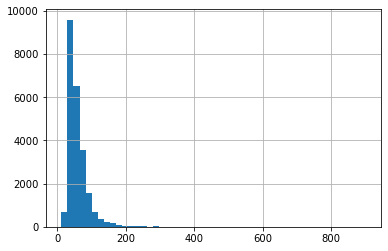

In [31]:
#площадь, цена, число комнат, высота потолков
data['total_area'].hist(bins=50)

<AxesSubplot:>

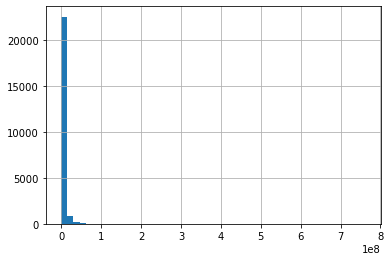

In [32]:
data['last_price'].hist(bins=50)

<AxesSubplot:>

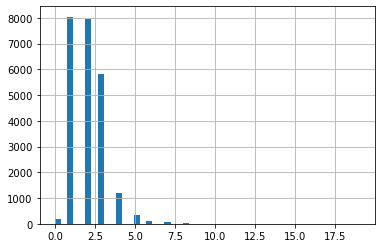

In [33]:
data['rooms'].hist(bins=50)

<AxesSubplot:>

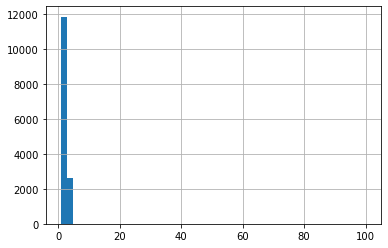

In [34]:
data['ceiling_height'].hist(bins=50)

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>Сначала выведем первые 1000 значений столбца 'days_exposition' (предварительно ещё во второй строке нашей проектной работы пропишем строку для полного вывода всех значений без сокращений) и выведем гистограмму для всех значений столбца 'days_exposition' с 50-ью корзинами.
<br>А для определения среднеарифметического значения и медианы рядом с названием столбца 'days_exposition' нужно прописать сответствующие методы для вычисления всех 23698 значений, с помощью методов mean() и median(). А также выведем с помощью метода все статистические непропущенные значения следующих параметров столбца 'days_exposition' (количество дней со дня размещения объявления о продаже аппартаментов): количество строк (count), среднеарифметическое значение (mean), среднеквдратическое отклонение (std), минимальное значение (min), значение к 25-%, 50-% (т.е. медиану) и 75-% квартили и максимальное значение (max).<br>
</div>

In [35]:
display(data['days_exposition'].head(1000))

0        95
1        81
2       558
3       424
4       121
5        55
6       155
7        95
8       189
9       289
10      137
11        7
12       90
13      366
14      203
15       19
16      397
17      571
18      168
19       97
20       74
21      310
22       60
23      615
24      265
25      300
26      265
27      151
28       74
29      125
30       63
31      112
32      224
33       92
34       15
35      644
36      139
37      196
38      103
39       29
40      430
41      179
42      987
43      763
44       95
45       95
46       95
47      179
48      322
49       95
50      152
51      541
52       95
53        6
54       44
55       69
56      152
57      173
58      298
59      336
60       11
61      609
62        5
63       37
64      143
65      216
66      186
67       39
68      234
69      194
70       14
71       95
72      141
73      166
74      121
75       36
76      606
77      186
78       45
79      463
80      235
81       95
82       60
83  

In [36]:
data['days_exposition'].mean()

169.36022616988058

In [37]:
days_exposition_median = data['days_exposition'].median()
days_exposition_median

95.0

<AxesSubplot:>

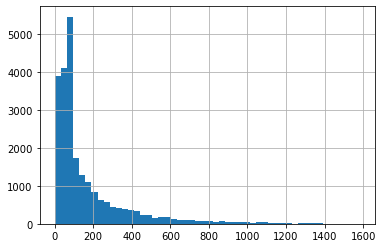

In [38]:
data['days_exposition'].hist(bins=50)

In [39]:
data['days_exposition'].describe()

count   23,699.00
mean       169.36
std        206.54
min          1.00
25%         45.00
50%         95.00
75%        199.00
max      1,580.00
Name: days_exposition, dtype: float64

<div class = "alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<h3>Комментарий студента</h3>
<br>Судя по данным из столбца времени по объявлении продажи аппартаментов в г. Санкт-Петербурге, продажа аппартаментов обычно занимает, судя по среднеарифметическому значению: чуть больше 169 дней, по медиане: 95 дней и 75%-ой квантили: 199 дней, что говорит о достаточно большом количестве выбросов после продажи аппартаментов в течении 790 дней после публикации (половинное значение от максимального значения по дням продажи жилья с момента выкладки по объявлению, судя по гистограмме количества дней после размещения объявления).<br>
Можно считать по гистограмме на 33-ей строке (из столбца 'days_exposition'), что продажи на срок до значения медианы (95 дней) считаются прошли очень быстро, а срок от 791 дней - необычно долго.  
</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
<br>А теперь подсчитаем количество значений и удалим все данные больше значения от 75% квантили по дням продажи жилья с момента выкладки по объявлению, а также все строки, где хотя бы в одном столбце было одно пропущенное значение.  
</div>

In [40]:
days_exposition_75 = data['days_exposition'].quantile(1)
days_exposition_75

1580.0

In [41]:
data = data.query('days_exposition <= @days_exposition_75 and ~(ceiling_height != ceiling_height) and ~(living_area != living_area) and ~(airports_nearest != airports_nearest)') 
data.head(30)

total_images    last_price  total_area first_day_exposition  rooms  \
0             20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
4              2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
9             18  5,400,000.00       61.00  2017-02-26T00:00:00      3   
10             5  5,050,000.00       39.60  2017-11-16T00:00:00      1   
13            20  3,550,000.00       42.80  2017-07-01T00:00:00      2   
16            11  6,700,000.00       82.00  2017-11-23T00:00:00      3   
18             8  3,250,000.00       31.00  2017-01-27T00:00:00      1   
19            16 14,200,000.00      121.00  2019-01-09T00:00:00      3   
20            12  6,120,000.00       80.00  2017-09-28T00:00:00      3   
23            11  2,950,000.00       32.00  2016-10-29T00:00:00      1   
25             3  6,800,000.00       76.00  2015-10-01T00:00:00      2   
27            20  7,100,000.00       70.00  2017-05-12T00:00:00      3   
28             8  4,170,000.00       44.00  2017-12-13T00:00:00      1   
31             8  7,200,000.00       67.90  2017-10-26T00:00:00      2   
34             3  3,290,000.00       33.00  2018-02-04T00:00:00      1   
39            15  5,200,000.00       54.40  2018-11-29T00:00:00      2   
40             9  3,590,000.00       36.00  2017-03-15T00:00:00      1   
42            13 22,000,000.00      161.80  2015-07-08T00:00:00      4   
43            13  9,330,000.00       48.00  2017-01-10T00:00:00      2   
45            17  5,200,000.00       50.60  2018-12-02T00:00:00      2   
46            17  6,600,000.00       52.10  2019-01-31T00:00:00      2   
49             1  3,050,000.00       30.80  2018-11-22T00:00:00      1   
50             1  4,500,000.00       48.20  2017-11-13T00:00:00      1   
51             7 45,000,000.00      161.00  2017-10-17T00:00:00      3   
52            20 11,795,000.00      136.00  2017-09-22T00:00:00      6   
55            20  7,400,000.00       58.80  2018-03-24T00:00:00      2   
56            14  4,350,000.00       41.00  2016-03-28T00:00:00      1   
58            11  3,900,000.00       33.00  2017-07-05T00:00:00      1   
63             2 20,000,000.00      118.00  2018-09-11T00:00:00      3   
65             7  4,400,000.00       57.00  2018-03-03T00:00:00      3   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70            16        51.00      8        False   False   
4             3.03            14        32.00     13        False   False   
9             2.50             9        43.60      7        False   False   
10            2.67            12        20.30      3        False   False   
13            2.56             5        27.00      5        False   False   
16            3.05             5        55.60      1        False   False   
18            2.50             5        19.40      2        False   False   
19            2.75            16        76.00      8        False   False   
20            2.70            27        48.00     11        False   False   
23            2.60             9        17.70      9        False   False   
25            2.75            23        39.00     18        False   False   
27            2.60            17        49.00     11        False   False   
28            2.90             6        20.80      1        False   False   
31            2.80            16        38.10      4        False   False   
34            2.55            16        14.00      3        False   False   
39            2.75             9        29.70      2        False   False   
40            2.60            26        15.00     22        False   False   
42            2.80             4        80.90      2        False   False   
43            3.00             4        28.00      4        False   False   
45            2.65             9        30.30      7        False   False   
46            2.60            24        29.70      9        False   False   
49            2

<AxesSubplot:>

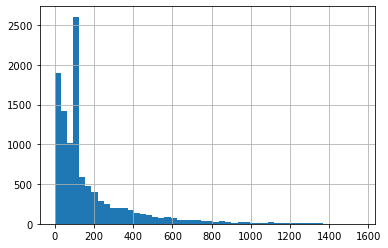

In [42]:
data['days_exposition'].hist(bins=50)

In [43]:
data.groupby('days_exposition')['days_exposition'].agg('count')

days_exposition
1          1
2          1
3         74
4         87
5         76
6         58
7        119
8         76
9         71
10        62
11        64
12        47
13        52
14        79
15        50
16        49
17        52
18        69
19        51
20        60
21        54
22        55
23        53
24        53
25        38
26        48
27        46
28        71
29        63
30       136
31        37
32        48
33        43
34        40
35        52
36        39
37        45
38        33
39        33
40        39
41        40
42        32
43        46
44        37
45       148
46        42
47        37
48        35
49        25
50        22
51        23
52        43
53        28
54        56
55        32
56        36
57        29
58        26
59        44
60       177
61        57
62        38
63        47
64        39
65        38
66        39
67        44
68        31
69        29
70        30
71        38
72        30
73        23
74        45
75        30
76       

<div class = "alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<h3>Комментарий студента</h3>
<br>Были обнаружены две самые главные особенности: после обработки датафрейма на момент обнаружения были исключены многие объявления, где количество вероятности количества одинаковых дней размещения объявления аппартаментов встречалось менее 20 раза (в исключительных случаях чуть больше 20 раз) и наибольшее количество объявлений было выявлено с количество объявлений при значении: data['days_exposition'] == 95, т.е. медианное значение дней размещения объявления (и это не удивительнро из-за предварительной предобработки данных в шаге № 2).    
</div>

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>А теперь с помощью метода .pivot_table(), изучим зависимости цен на аппартаменты ('last_price') от значений площадей ('total_area'), числа комнат ('rooms') и удалённости от центра ('city_centers_nearest'), сохраняя данные в переменную data_total_area. Также с помощью строки:<br><br>название таблицы, составленной с помощью метода .pivot_table(), в значении x - это название индексного столбца, которая будет позже предварительно преобразована с помощью метода .reset_index(level=0), y - это сторока, которая была под воздействием параметра values в методе .pivot_table(),<br><br>а также построим точечные графики таблиц медианных зависимостей цен на недвижимость от площадей квартиры, с помощью метода .plot().
</div>

In [44]:
data_total_area = data.pivot_table(index=['total_area'], values=['last_price'], aggfunc='median').sort_values(by=['total_area'])                   
data_total_area

last_price
total_area               
12.00        2,400,000.00
17.00        1,700,000.00
17.78        1,737,000.00
18.00        2,600,000.00
18.40        2,200,000.00
18.80        1,350,000.00
19.00        2,190,000.00
20.00        1,870,000.00
20.30        2,740,000.00
21.00        2,200,000.00
21.40        4,000,000.00
21.90        3,000,000.00
22.00        2,425,000.00
22.70        2,900,000.00
23.00        3,100,000.00
23.30        3,790,000.00
23.40        3,090,000.00
23.50        3,250,000.00
23.60        3,200,000.00
24.00        3,025,000.00
24.30        3,190,000.00
24.50        3,590,000.00
24.60        4,200,000.00
24.70        2,880,000.00
24.80        2,830,000.00
24.90        3,335,000.00
25.00        3,590,000.00
25.48        2,690,000.00
25.50        3,375,000.00
25.60        2,690,000.00
25.70        2,450,000.00
26.00        3,200,000.00
26.10        3,590,000.00
26.20        3,199,000.00
26.40        3,720,000.00
26.49        3,670,000.00
26.69        2,700,000.00
27.00        3,350,000.00
27.10        3,600,000.00
27.20        3,500,000.00
27.30        3,122,500.00
27.40        3,950,000.00
27.55        3,550,000.00
27.60        2,980,000.00
27.70        2,420,000.00
27.90        2,945,000.00
28.00        3,350,000.00
28.10        3,000,000.00
28.20        3,200,000.00
28.30        2,300,000.00
28.50        3,875,000.00
28.60        3,900,000.00
28.70        3,150,000.00
28.71        3,500,000.00
28.80        3,000,000.00
28.86        3,577,388.00
28.90        2,875,000.00
29.00        3,150,000.00
29.10        3,300,000.00
29.14        3,200,000.00
29.20        3,300,000.00
29.30        3,470,000.00
29.40        2,919,911.00
29.50        3,550,000.00
29.60        3,850,000.00
29.70        2,380,000.00
29.80        3,300,000.00
29.90        3,390,000.00
29.99        2,426,000.00
30.00        3,180,000.00
30.10        2,950,000.00
30.11        2,500,000.00
30.20        2,800,000.00
30.30        3,217,500.00
30.35        3,200,000.00
30.40        2,900,000.00
30.43        3,100,000.00
30.50        3,100,000.00
30.53        3,000,000.00
30.60        3,190,000.00
30.61        3,000,000.00
30.64        3,500,000.00
30.70        3,150,000.00
30.80        3,175,000.00
30.90        3,400,000.00
31.00        3,300,000.00
31.09        2,750,000.00
31.10        3,100,000.00
31.20        3,150,000.00
31.23        3,770,000.00
31.30        3,150,000.00
31.40        3,145,000.00
31.50        3,290,000.00
31.60        2,975,000.00
31.70        2,650,000.00
31.80        3,125,000.00
31.84        3,300,000.00
31.85        2,550,000.00
31.90        3,200,000.00
32.00        3,250,000.00
32.10        3,390,000.00
32.17        3,050,000.00
32.20        3,240,000.00
32.30        3,590,000.00
32.40        3,369,000.00
32.50        3,400,000.00
32.51        4,280,000.00
32.59        4,010,000.00
32.60        3,450,000.00
32.70        3,475,000.00
32.80        3,350,000.00
32.90        3,435,000.00
32.99        4,229,988.00
33.00        3,490,000.00
33.10        3,700,000.00
33.17        3,150,000.00
33.20        3,842,000.00
33.22        2,980,000.00
33.24        3,600,000.00
33.30        3,600,000.00
33.31        3,790,000.00
33.40        3,190,000.00
33.50        3,800,000.00
33.57        3,258,925.00
33.60        4,150,000.00
33.70        3,400,000.00
33.80        3,600,000.00
33.90        3,950,000.00
34.00        3,555,000.00
34.09        3,730,000.00
34.10        4,180,000.00
34.14        2,870,000.00
34.20        4,025,067.00
34.21        3,000,000.00
34.30        4,150,000.00
34.36        2,895,000.00
34.40        3,500,000.00
34.42        3,150,000.00
34.46        3,350,000.00
34.50        3,625,000.00
34.55        6,329,970.00
34.60        3,500,000.00
34.69        3,364,930.00
34.70        4,225,000.00
34.75        3,805,000.00
34.80        4,490,000.00
34.90        4,025,000.00
35.00        3,850,000.00
35.10        3,690,000.00
35.20        3,807,500.00
35.30        3,750,000.00
35.40        3,545,000.00
35.41      

In [45]:
data_total_area = data_total_area.reset_index(level=0)
data_total_area

total_area     last_price
0          12.00   2,400,000.00
1          17.00   1,700,000.00
2          17.78   1,737,000.00
3          18.00   2,600,000.00
4          18.40   2,200,000.00
5          18.80   1,350,000.00
6          19.00   2,190,000.00
7          20.00   1,870,000.00
8          20.30   2,740,000.00
9          21.00   2,200,000.00
10         21.40   4,000,000.00
11         21.90   3,000,000.00
12         22.00   2,425,000.00
13         22.70   2,900,000.00
14         23.00   3,100,000.00
15         23.30   3,790,000.00
16         23.40   3,090,000.00
17         23.50   3,250,000.00
18         23.60   3,200,000.00
19         24.00   3,025,000.00
20         24.30   3,190,000.00
21         24.50   3,590,000.00
22         24.60   4,200,000.00
23         24.70   2,880,000.00
24         24.80   2,830,000.00
25         24.90   3,335,000.00
26         25.00   3,590,000.00
27         25.48   2,690,000.00
28         25.50   3,375,000.00
29         25.60   2,690,000.00
30         25.70   2,450,000.00
31         26.00   3,200,000.00
32         26.10   3,590,000.00
33         26.20   3,199,000.00
34         26.40   3,720,000.00
35         26.49   3,670,000.00
36         26.69   2,700,000.00
37         27.00   3,350,000.00
38         27.10   3,600,000.00
39         27.20   3,500,000.00
40         27.30   3,122,500.00
41         27.40   3,950,000.00
42         27.55   3,550,000.00
43         27.60   2,980,000.00
44         27.70   2,420,000.00
45         27.90   2,945,000.00
46         28.00   3,350,000.00
47         28.10   3,000,000.00
48         28.20   3,200,000.00
49         28.30   2,300,000.00
50         28.50   3,875,000.00
51         28.60   3,900,000.00
52         28.70   3,150,000.00
53         28.71   3,500,000.00
54         28.80   3,000,000.00
55         28.86   3,577,388.00
56         28.90   2,875,000.00
57         29.00   3,150,000.00
58         29.10   3,300,000.00
59         29.14   3,200,000.00
60         29.20   3,300,000.00
61         29.30   3,470,000.00
62         29.40   2,919,911.00
63         29.50   3,550,000.00
64         29.60   3,850,000.00
65         29.70   2,380,000.00
66         29.80   3,300,000.00
67         29.90   3,390,000.00
68         29.99   2,426,000.00
69         30.00   3,180,000.00
70         30.10   2,950,000.00
71         30.11   2,500,000.00
72         30.20   2,800,000.00
73         30.30   3,217,500.00
74         30.35   3,200,000.00
75         30.40   2,900,000.00
76         30.43   3,100,000.00
77         30.50   3,100,000.00
78         30.53   3,000,000.00
79         30.60   3,190,000.00
80         30.61   3,000,000.00
81         30.64   3,500,000.00
82         30.70   3,150,000.00
83         30.80   3,175,000.00
84         30.90   3,400,000.00
85         31.00   3,300,000.00
86         31.09   2,750,000.00
87         31.10   3,100,000.00
88         31.20   3,150,000.00
89         31.23   3,770,000.00
90         31.30   3,150,000.00
91         31.40   3,145,000.00
92         31.50   3,290,000.00
93         31.60   2,975,000.00
94         31.70   2,650,000.00
95         31.80   3,125,000.00
96         31.84   3,300,000.00
97         31.85   2,550,000.00
98         31.90   3,200,000.00
99         32.00   3,250,000.00
100        32.10   3,390,000.00
101        32.17   3,050,000.00
102        32.20   3,240,000.00
103        32.30   3,590,000.00
104        32.40   3,369,000.00
105        32.50   3,400,000.00
106        32.51   4,280,000.00
107        32.59   4,010,000.00
108        32.60   3,450,000.00
109        32.70   3,475,000.00
110        32.80   3,350,000.00
111        32.90   3,435,000.00
112        32.99   4,229,988.00
113        33.00   3,490,000.00
114        33.10   3,700,000.00
115        33.17   3,150,000.00
116        33.20   3,842,000.00
117        33.22   2,980,000.00
118        33.24   3,600,000.00
119        33.30   3,600,000.00
120        33.31   3,790,000.00
121        33.40   3,190,000.00
122        33.50   3,800,000.00
123        33.57   3,258,925.00
124   

<AxesSubplot:xlabel='total_area'>

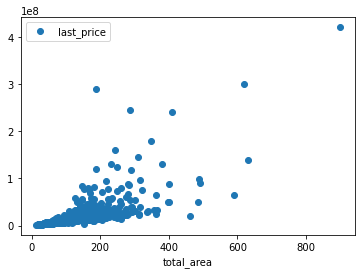

In [46]:
data_total_area.plot(x = 'total_area', y = 'last_price', style = 'o') 

In [47]:
data_total_area.corr()

total_area  last_price
total_area        1.00        0.73
last_price        0.73        1.00

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>Чтобы сделать наиболее достоверные выводы для изучения характеристик графика зависимости цен на аппартменты для четырёх различных различных параметров (в данном случае от площади квартир), судя по графику, оставим только те значения: где средняя цена на недвижимость, которые не превышают 100 миллионов рублей и общей площади жилья - до 400 квадратных метров, а затем построим точечный график, как в строке 46.
</div>

In [48]:
data_total_area = data_total_area.query('total_area <= 400 & last_price <= 10 ** 8').sort_values(by=['total_area'])    
data_total_area

total_area    last_price
0          12.00  2,400,000.00
1          17.00  1,700,000.00
2          17.78  1,737,000.00
3          18.00  2,600,000.00
4          18.40  2,200,000.00
5          18.80  1,350,000.00
6          19.00  2,190,000.00
7          20.00  1,870,000.00
8          20.30  2,740,000.00
9          21.00  2,200,000.00
10         21.40  4,000,000.00
11         21.90  3,000,000.00
12         22.00  2,425,000.00
13         22.70  2,900,000.00
14         23.00  3,100,000.00
15         23.30  3,790,000.00
16         23.40  3,090,000.00
17         23.50  3,250,000.00
18         23.60  3,200,000.00
19         24.00  3,025,000.00
20         24.30  3,190,000.00
21         24.50  3,590,000.00
22         24.60  4,200,000.00
23         24.70  2,880,000.00
24         24.80  2,830,000.00
25         24.90  3,335,000.00
26         25.00  3,590,000.00
27         25.48  2,690,000.00
28         25.50  3,375,000.00
29         25.60  2,690,000.00
30         25.70  2,450,000.00
31         26.00  3,200,000.00
32         26.10  3,590,000.00
33         26.20  3,199,000.00
34         26.40  3,720,000.00
35         26.49  3,670,000.00
36         26.69  2,700,000.00
37         27.00  3,350,000.00
38         27.10  3,600,000.00
39         27.20  3,500,000.00
40         27.30  3,122,500.00
41         27.40  3,950,000.00
42         27.55  3,550,000.00
43         27.60  2,980,000.00
44         27.70  2,420,000.00
45         27.90  2,945,000.00
46         28.00  3,350,000.00
47         28.10  3,000,000.00
48         28.20  3,200,000.00
49         28.30  2,300,000.00
50         28.50  3,875,000.00
51         28.60  3,900,000.00
52         28.70  3,150,000.00
53         28.71  3,500,000.00
54         28.80  3,000,000.00
55         28.86  3,577,388.00
56         28.90  2,875,000.00
57         29.00  3,150,000.00
58         29.10  3,300,000.00
59         29.14  3,200,000.00
60         29.20  3,300,000.00
61         29.30  3,470,000.00
62         29.40  2,919,911.00
63         29.50  3,550,000.00
64         29.60  3,850,000.00
65         29.70  2,380,000.00
66         29.80  3,300,000.00
67         29.90  3,390,000.00
68         29.99  2,426,000.00
69         30.00  3,180,000.00
70         30.10  2,950,000.00
71         30.11  2,500,000.00
72         30.20  2,800,000.00
73         30.30  3,217,500.00
74         30.35  3,200,000.00
75         30.40  2,900,000.00
76         30.43  3,100,000.00
77         30.50  3,100,000.00
78         30.53  3,000,000.00
79         30.60  3,190,000.00
80         30.61  3,000,000.00
81         30.64  3,500,000.00
82         30.70  3,150,000.00
83         30.80  3,175,000.00
84         30.90  3,400,000.00
85         31.00  3,300,000.00
86         31.09  2,750,000.00
87         31.10  3,100,000.00
88         31.20  3,150,000.00
89         31.23  3,770,000.00
90         31.30  3,150,000.00
91         31.40  3,145,000.00
92         31.50  3,290,000.00
93         31.60  2,975,000.00
94         31.70  2,650,000.00
95         31.80  3,125,000.00
96         31.84  3,300,000.00
97         31.85  2,550,000.00
98         31.90  3,200,000.00
99         32.00  3,250,000.00
100        32.10  3,390,000.00
101        32.17  3,050,000.00
102        32.20  3,240,000.00
103        32.30  3,590,000.00
104        32.40  3,369,000.00
105        32.50  3,400,000.00
106        32.51  4,280,000.00
107        32.59  4,010,000.00
108        32.60  3,450,000.00
109        32.70  3,475,000.00
110        32.80  3,350,000.00
111        32.90  3,435,000.00
112        32.99  4,229,988.00
113        33.00  3,490,000.00
114        33.10  3,700,000.00
115        33.17  3,150,000.00
116        33.20  3,842,000.00
117        33.22  2,980,000.00
118        33.24  3,600,000.00
119        33.30  3,600,000.00
120        33.31  3,790,000.00
121        33.40  3,190,000.00
122        33.50  3,800,000.00
123        33.57  3,258,925.00
124        33.60  4,150,000.00
125        33.70  3,400,000.00
126        33.80  3,600,000.00
127        33.90  3,950,000.00
128    

<AxesSubplot:xlabel='total_area'>

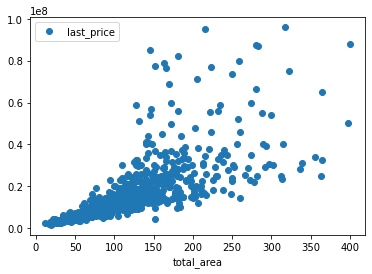

In [49]:
data_total_area.plot(x = 'total_area', y = 'last_price', style = 'o') 

In [50]:
data_total_area.corr()

total_area  last_price
total_area        1.00        0.78
last_price        0.78        1.00

<div class = "alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<h3>Комментарий студента</h3>
<br>
    Как мы видим, что корреляция зависимости цены на недвижимость от площади аппартаментов выражается положительным числом (точнее чем ближе к наибольшему значению площади аппартаментов, тем тем выше цена на момент снятия с публикации), не только из-за "чистки" от редких премиум-предложений (свыше 200 миллионов рублей и площадью более 400 квадратных метров, правда изменилась на совсем незначительную величину (на 0.03), но зато показана значительная часть в виде точечных значений зависимости стоимости жилья от площади аппартаментов.
</div>

In [51]:
data_rooms = data.pivot_table(index=['rooms'], values=['last_price'], aggfunc='median').sort_values(by=['rooms'])                   
data_rooms

last_price
rooms               
0       3,450,000.00
1       3,950,000.00
2       5,400,000.00
3       6,800,000.00
4       9,700,000.00
5      14,200,000.00
6      18,075,000.00
7      24,950,000.00
8      21,045,000.00
9      26,500,000.00
10     23,000,000.00
11     25,250,000.00
12    420,000,000.00
14     25,000,000.00
15     65,000,000.00
16     28,500,000.00

In [52]:
data_rooms = data_rooms.reset_index(level=0)

<AxesSubplot:xlabel='rooms'>

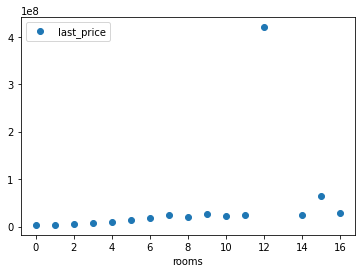

In [53]:
data_rooms.plot(x = 'rooms', y = 'last_price', style = 'o') 

In [54]:
data_rooms.corr()

rooms  last_price
rooms        1.00        0.34
last_price   0.34        1.00

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>Сократим значения данных с его графиком до значений: стоимости жилья до 100 миллионов рублей и количества комнат до 15-ти и сравним два графика (исходный и обновлённый) и его корреляционные значения. 
</div>

In [55]:
data_rooms = data_rooms.query('last_price <= 10**8 & rooms < 15').sort_values(by=['rooms'])    
data_rooms

rooms    last_price
0       0  3,450,000.00
1       1  3,950,000.00
2       2  5,400,000.00
3       3  6,800,000.00
4       4  9,700,000.00
5       5 14,200,000.00
6       6 18,075,000.00
7       7 24,950,000.00
8       8 21,045,000.00
9       9 26,500,000.00
10     10 23,000,000.00
11     11 25,250,000.00
13     14 25,000,000.00

<AxesSubplot:xlabel='rooms'>

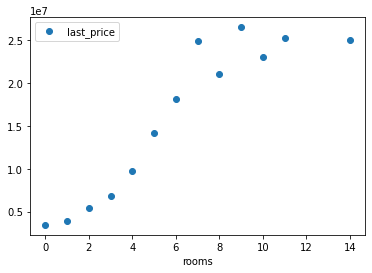

In [56]:
data_rooms.plot(x = 'rooms', y = 'last_price', style = 'o') 

In [57]:
data_rooms.corr()

rooms  last_price
rooms        1.00        0.92
last_price   0.92        1.00

<div class = "alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<h3>Комментарий студента:</h3>
<br>
    Обновлённый график, где иллюстрирует параметры аппартаментов со стоимостью до 100 миллоинов рублей и до 14 комнат более четкой восходящей линейной зависимостью, чем его исходный график из-за увеличеного значения корреляции (0.92 - 0.34 = 0.58).
</div>

In [58]:
data_city_centers_nearest = data.pivot_table(index=['city_centers_nearest'], values=['last_price'], aggfunc='median').sort_values(by=['city_centers_nearest'])                   
data_city_centers_nearest  

last_price
city_centers_nearest               
181.00                31,099,000.00
208.00                 5,800,000.00
215.00                10,990,000.00
287.00                 9,590,000.00
291.00                11,500,000.00
318.00                32,750,000.00
329.00                 7,200,000.00
376.00                13,500,000.00
387.00                13,500,000.00
392.00                11,500,000.00
399.00                17,100,000.00
423.00                24,250,000.00
436.00                95,000,000.00
552.00                 9,555,000.00
573.00                75,000,000.00
583.00                11,500,000.00
594.00                75,000,000.00
602.00                23,800,000.00
621.00                12,000,000.00
639.00                29,900,000.00
649.00                22,400,000.00
650.00                15,900,000.00
653.00                12,200,000.00
658.00                 8,500,000.00
672.00                 9,000,000.00
675.00                12,000,000.00
686.00                12,500,000.00
700.00                16,550,000.00
729.00                11,100,000.00
730.00                 9,900,000.00
743.00                 8,000,000.00
772.00                10,150,000.00
801.00                10,000,000.00
814.00                29,500,000.00
820.00                12,999,000.00
833.00                 9,000,000.00
835.00                 8,500,000.00
853.00                 4,000,000.00
869.00                 8,000,000.00
904.00                 7,500,000.00
936.00                11,490,000.00
945.00                49,950,000.00
959.00                 6,200,000.00
964.00                 2,400,000.00
1,015.00              33,000,000.00
1,032.00              95,000,000.00
1,053.00              11,900,000.00
1,073.00             289,238,400.00
1,075.00              18,325,000.00
1,090.00               6,300,000.00
1,096.00              10,000,000.00
1,113.00              10,100,000.00
1,117.00               5,950,000.00
1,122.00              14,350,000.00
1,124.00               6,990,000.00
1,139.00              11,950,000.00
1,152.00              22,190,000.00
1,155.00              13,000,000.00
1,162.00               9,200,000.00
1,166.00               6,800,000.00
1,178.00              10,970,000.00
1,179.00              18,200,000.00
1,181.00               7,400,000.00
1,190.00              11,900,000.00
1,195.00              12,000,000.00
1,197.00             330,000,000.00
1,200.00              13,950,000.00
1,205.00               7,000,000.00
1,211.00              17,000,000.00
1,214.00               5,700,000.00
1,217.00               6,999,000.00
1,218.00               8,700,000.00
1,223.00               8,900,000.00
1,225.00              30,000,000.00
1,229.00              30,750,000.00
1,238.00               5,500,000.00
1,240.00              23,900,000.00
1,248.00               8,250,000.00
1,250.00              13,800,000.00
1,253.00               6,950,000.00
1,255.00               8,250,000.00
1,257.00               6,825,000.00
1,261.00               7,275,000.00
1,269.00              12,600,000.00
1,272.00              29,000,000.00
1,280.00             106,000,000.00
1,283.00              12,000,000.00
1,285.00              27,500,000.00
1,291.00               6,590,000.00
1,292.00               7,700,000.00
1,298.00              18,900,000.00
1,308.00              10,100,000.00
1,313.00              17,675,000.00
1,322.00              11,070,000.00
1,325.00              11,300,000.00
1,327.00              16,500,000.00
1,328.00              64,595,000.00
1,356.00              11,490,000.00
1,360.00              11,000,000.00
1,365.00              17,500,000.00
1,376.00              14,400,000.00
1,381.00              11,500,000.00
1,384.00               6,800,000.00
1,397.00              15,200,000.00
1,424.00              19,000,000.00
1,429.00               6,550,000.00
1,454.00              17,100,000.00
1,463.00              15,300,000.00
1,467.00               5,300,000.00
1,471.00              14,000,

In [59]:
data_city_centers_nearest = data_city_centers_nearest.reset_index(level=0)

<AxesSubplot:xlabel='city_centers_nearest'>

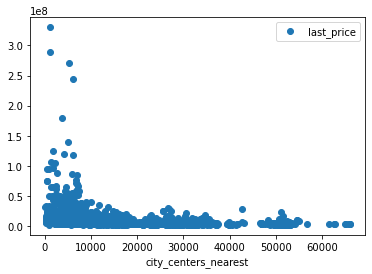

In [60]:
data_city_centers_nearest.plot(x = 'city_centers_nearest', y = 'last_price', style = 'o') 

In [61]:
data_city_centers_nearest.corr()

city_centers_nearest  last_price
city_centers_nearest                  1.00       -0.23
last_price                           -0.23        1.00

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>Сделаем обновлённый график, где предельное значение стоимости жилья составляет 60 миллионов рублей.
</div>

In [62]:
data_city_centers_nearest = data_city_centers_nearest.query('last_price <= 6 * 10**7').sort_values(by=['city_centers_nearest'])    
data_city_centers_nearest # & city_centers_nearest <= 2 * 10**4

city_centers_nearest    last_price
0                   181.00 31,099,000.00
1                   208.00  5,800,000.00
2                   215.00 10,990,000.00
3                   287.00  9,590,000.00
4                   291.00 11,500,000.00
5                   318.00 32,750,000.00
6                   329.00  7,200,000.00
7                   376.00 13,500,000.00
8                   387.00 13,500,000.00
9                   392.00 11,500,000.00
10                  399.00 17,100,000.00
11                  423.00 24,250,000.00
13                  552.00  9,555,000.00
15                  583.00 11,500,000.00
17                  602.00 23,800,000.00
18                  621.00 12,000,000.00
19                  639.00 29,900,000.00
20                  649.00 22,400,000.00
21                  650.00 15,900,000.00
22                  653.00 12,200,000.00
23                  658.00  8,500,000.00
24                  672.00  9,000,000.00
25                  675.00 12,000,000.00
26                  686.00 12,500,000.00
27                  700.00 16,550,000.00
28                  729.00 11,100,000.00
29                  730.00  9,900,000.00
30                  743.00  8,000,000.00
31                  772.00 10,150,000.00
32                  801.00 10,000,000.00
33                  814.00 29,500,000.00
34                  820.00 12,999,000.00
35                  833.00  9,000,000.00
36                  835.00  8,500,000.00
37                  853.00  4,000,000.00
38                  869.00  8,000,000.00
39                  904.00  7,500,000.00
40                  936.00 11,490,000.00
41                  945.00 49,950,000.00
42                  959.00  6,200,000.00
43                  964.00  2,400,000.00
44                1,015.00 33,000,000.00
46                1,053.00 11,900,000.00
48                1,075.00 18,325,000.00
49                1,090.00  6,300,000.00
50                1,096.00 10,000,000.00
51                1,113.00 10,100,000.00
52                1,117.00  5,950,000.00
53                1,122.00 14,350,000.00
54                1,124.00  6,990,000.00
55                1,139.00 11,950,000.00
56                1,152.00 22,190,000.00
57                1,155.00 13,000,000.00
58                1,162.00  9,200,000.00
59                1,166.00  6,800,000.00
60                1,178.00 10,970,000.00
61                1,179.00 18,200,000.00
62                1,181.00  7,400,000.00
63                1,190.00 11,900,000.00
64                1,195.00 12,000,000.00
66                1,200.00 13,950,000.00
67                1,205.00  7,000,000.00
68                1,211.00 17,000,000.00
69                1,214.00  5,700,000.00
70                1,217.00  6,999,000.00
71                1,218.00  8,700,000.00
72                1,223.00  8,900,000.00
73                1,225.00 30,000,000.00
74                1,229.00 30,750,000.00
75                1,238.00  5,500,000.00
76                1,240.00 23,900,000.00
77                1,248.00  8,250,000.00
78                1,250.00 13,800,000.00
79                1,253.00  6,950,000.00
80                1,255.00  8,250,000.00
81                1,257.00  6,825,000.00
82                1,261.00  7,275,000.00
83                1,269.00 12,600,000.00
84                1,272.00 29,000,000.00
86                1,283.00 12,000,000.00
87                1,285.00 27,500,000.00
88                1,291.00  6,590,000.00
89                1,292.00  7,700,000.00
90                1,298.00 18,900,000.00
91                1,308.00 10,100,000.00
92                1,313.00 17,675,000.00
93                1,322.00 11,070,000.00
94                1,325.00 11,300,000.00
95                1,327.00 16,500,000.00
97                1,356.00 11,490,000.00
98                1,360.00 11,000,000.00
99                1,365.00 17,500,000.00
100               1,376.00 14,400,000.00
101               1,381.00 11,500,000.00
102               1,384.00  6,800,000.00
103               1,397.00 15,200,000.00
104               1,424.00 19

<AxesSubplot:xlabel='city_centers_nearest'>

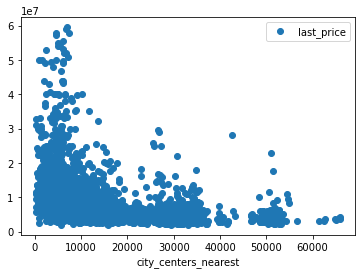

In [63]:
data_city_centers_nearest.plot(x = 'city_centers_nearest', y = 'last_price', style = 'o')

In [64]:
data_city_centers_nearest.corr()

city_centers_nearest  last_price
city_centers_nearest                  1.00       -0.33
last_price                           -0.33        1.00

<div class = "alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<h3>Комментарий студента</h3>
<br>
    А вот линейная зависимость стоимости аппартаментов от близости к центра города не имеется, из-за хаотичного расположения точек зависимости цены на недвижимость от близости центра города (т.е. значение корреляции даже точнее к нулевому значению, чем при исследовании зависимости цены на недвижимость от количества комнат). 
</div>

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>А теперь изучим зависимость цены на недвижимость от расположения этажа в целом доме, но предварительно просмотрим те строки, где количество этажей совпадает с номером расположения квартиры (т.е. последний этаж квартиры) и поставить число -100, а остальных случаях поставим такое же значение, как и значение из столбца 'floor'. А затем снова сделаем по такой же процедуре, что и для исследования зависимостей с: 'total_area', 'rooms' и 'city_centers_nearest'. <br>    
</div>

In [65]:
data[data['floor'] == data['floors_total']].head(30)

total_images    last_price  total_area first_day_exposition  rooms  \
13             20  3,550,000.00       42.80  2017-07-01T00:00:00      2   
23             11  2,950,000.00       32.00  2016-10-29T00:00:00      1   
43             13  9,330,000.00       48.00  2017-01-10T00:00:00      2   
52             20 11,795,000.00      136.00  2017-09-22T00:00:00      6   
85             13  5,200,000.00       46.30  2018-11-26T00:00:00      2   
95             14  5,150,000.00       47.00  2018-08-06T00:00:00      2   
107             1 11,000,000.00      101.00  2016-04-13T00:00:00      4   
143             9  2,990,000.00       30.00  2016-06-08T00:00:00      1   
146            11  4,400,000.00       53.60  2018-03-31T00:00:00      2   
147            10 27,700,000.00      179.60  2017-07-06T00:00:00      5   
155             8 96,000,000.00      317.00  2017-07-07T00:00:00      4   
159            14  7,050,000.00       66.00  2017-09-04T00:00:00      3   
162             2  5,600,000.00       66.00  2018-07-11T00:00:00      3   
169             0  6,180,000.00       85.00  2017-06-02T00:00:00      3   
178            18 16,300,000.00      153.00  2019-03-30T00:00:00      4   
179             5 14,800,000.00      108.70  2019-04-11T00:00:00      3   
193             6  7,920,000.00       83.80  2017-08-17T00:00:00      4   
216            14  6,700,000.00       65.60  2018-02-27T00:00:00      2   
249            15  5,000,000.00       70.50  2018-01-23T00:00:00      3   
254            10  3,350,000.00       31.20  2017-06-30T00:00:00      1   
275             4  2,000,000.00       31.00  2015-06-24T00:00:00      1   
278            19  6,000,000.00       56.70  2019-03-11T00:00:00      2   
290             7  3,900,000.00       51.00  2018-02-22T00:00:00      2   
328            11  4,950,000.00       45.80  2019-04-04T00:00:00      2   
344            18  6,200,000.00       46.90  2018-07-30T00:00:00      2   
366            10  3,400,000.00       29.90  2017-12-21T00:00:00      1   
367            13  3,450,000.00       40.00  2017-10-17T00:00:00      1   
368            19 12,500,000.00       85.00  2018-09-21T00:00:00      3   
400            18  2,450,000.00       31.50  2018-08-25T00:00:00      1   
424            14 11,500,000.00       98.00  2016-05-10T00:00:00      3   

     ceiling_height  floors_total  living_area  floor is_apartment  studio  \
13             2.56             5        27.00      5        False   False   
23             2.60             9        17.70      9        False   False   
43             3.00             4        28.00      4        False   False   
52             3.00             2        94.00      2        False   False   
85             3.00             5        27.80      5        False   False   
95             2.75             9        28.10      9        False   False   
107            3.00             3        73.00      3        False   False   
143            2.50             9        20.00      9        False   False   
146            2.55            10        29.20     10        False   False   
147            2.85            25        97.20     25        False   False   
155            3.50             3       183.00      3        False   False   
159            3.00             4        37.80      4        False   False   
162            2.50             9        48.00      9        False   False   
169            2.80            17        51.80     17        False   False   
178            2.71            10        89.40     10        False   False   
179            4.00             5        72.40      5        False   False   
193            2.47             9        55.90      9        False   False   
216            2.55            10        36.70     10        False   False   
249            2.65             9        44.90      9        False   False   
254            2.50             9        15.60      9        False   False   
275            2.75             9        

In [66]:
display(data.head(200))

total_images    last_price  total_area first_day_exposition  rooms  \
0              20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
4               2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
9              18  5,400,000.00       61.00  2017-02-26T00:00:00      3   
10              5  5,050,000.00       39.60  2017-11-16T00:00:00      1   
13             20  3,550,000.00       42.80  2017-07-01T00:00:00      2   
16             11  6,700,000.00       82.00  2017-11-23T00:00:00      3   
18              8  3,250,000.00       31.00  2017-01-27T00:00:00      1   
19             16 14,200,000.00      121.00  2019-01-09T00:00:00      3   
20             12  6,120,000.00       80.00  2017-09-28T00:00:00      3   
23             11  2,950,000.00       32.00  2016-10-29T00:00:00      1   
25              3  6,800,000.00       76.00  2015-10-01T00:00:00      2   
27             20  7,100,000.00       70.00  2017-05-12T00:00:00      3   
28              8  4,170,000.00       44.00  2017-12-13T00:00:00      1   
31              8  7,200,000.00       67.90  2017-10-26T00:00:00      2   
34              3  3,290,000.00       33.00  2018-02-04T00:00:00      1   
39             15  5,200,000.00       54.40  2018-11-29T00:00:00      2   
40              9  3,590,000.00       36.00  2017-03-15T00:00:00      1   
42             13 22,000,000.00      161.80  2015-07-08T00:00:00      4   
43             13  9,330,000.00       48.00  2017-01-10T00:00:00      2   
45             17  5,200,000.00       50.60  2018-12-02T00:00:00      2   
46             17  6,600,000.00       52.10  2019-01-31T00:00:00      2   
49              1  3,050,000.00       30.80  2018-11-22T00:00:00      1   
50              1  4,500,000.00       48.20  2017-11-13T00:00:00      1   
51              7 45,000,000.00      161.00  2017-10-17T00:00:00      3   
52             20 11,795,000.00      136.00  2017-09-22T00:00:00      6   
55             20  7,400,000.00       58.80  2018-03-24T00:00:00      2   
56             14  4,350,000.00       41.00  2016-03-28T00:00:00      1   
58             11  3,900,000.00       33.00  2017-07-05T00:00:00      1   
63              2 20,000,000.00      118.00  2018-09-11T00:00:00      3   
65              7  4,400,000.00       57.00  2018-03-03T00:00:00      3   
67              6  2,550,000.00       31.00  2018-08-28T00:00:00      1   
71             20  4,850,000.00       57.50  2019-03-27T00:00:00      3   
72             10  4,500,000.00       55.00  2018-12-09T00:00:00      2   
74              3  2,350,000.00       34.00  2018-06-14T00:00:00      1   
75             19  4,950,000.00       44.00  2018-02-27T00:00:00      2   
77              7  4,300,000.00       62.10  2016-03-13T00:00:00      3   
83             10  4,200,000.00       41.40  2018-09-24T00:00:00      1   
85             13  5,200,000.00       46.30  2018-11-26T00:00:00      2   
87             19  4,999,000.00       52.00  2019-04-23T00:00:00      2   
93             10  3,500,000.00       40.40  2016-06-15T00:00:00      1   
94              3  3,500,000.00       29.50  2019-04-26T00:00:00      1   
95             14  5,150,000.00       47.00  2018-08-06T00:00:00      2   
96             20  8,780,000.00       78.30  2018-08-24T00:00:00      3   
103            14  4,800,000.00       35.00  2018-10-04T00:00:00      1   
104            15  6,900,000.00       77.20  2018-04-18T00:00:00      4   
106             9 10,500,000.00      124.10  2017-05-25T00:00:00      5   
107             1 11,000,000.00      101.00  2016-04-13T00:00:00      4   
108             9  9,490,000.00       80.00  2017-10-30T00:00:00      3   
114             5  4,000,000.00       21.40  2019-02-07T00:00:00      1   
117            10  8,520,000.00       84.70  2018-03-04T00:00:00      3   
118             8  4,500,000.00       31.00  2019-02-24T00:00:00      1   
120            11  2,500,000.00       30.90  2017-10-20T00:00:00      1   
121            20 33,000,000.0

In [67]:
data_date = data.pivot_table(index=['floor'], values=['last_price'], aggfunc='median').sort_values(by=['floor'])                   
data_date

last_price
floor              
1      4,780,000.00
2      5,490,000.00
3      5,700,000.00
4      5,700,000.00
5      5,100,000.00
6      5,500,000.00
7      5,250,000.00
8      5,100,000.00
9      5,100,000.00
10     5,600,000.00
11     5,900,000.00
12     5,656,500.00
13     5,950,000.00
14     5,400,000.00
15     5,500,000.00
16     6,000,000.00
17     5,930,878.50
18     6,100,000.00
19     5,700,000.00
20     5,700,000.00
21     6,670,000.00
22     5,900,000.00
23     5,250,000.00
24     5,375,000.00
25     5,980,000.00
26     4,245,000.00
27     6,199,500.00
29     9,200,000.00
30    10,150,000.00

In [68]:
data_date = data_date.reset_index(level=0)

<AxesSubplot:xlabel='floor'>

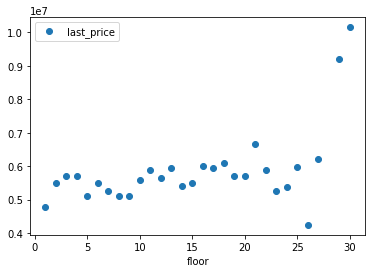

In [69]:
data_date.plot(x = 'floor', y = 'last_price', style = 'o')

In [70]:
data_date.corr()

floor  last_price
floor        1.00        0.52
last_price   0.52        1.00

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>Судя по значениям точечных графиков нужно отбросить 8-миллионные значения цен на недвижимость.<br>
</div>

In [71]:
data_date = data_date.query('last_price <= 8 * 10**6')

<AxesSubplot:xlabel='floor'>

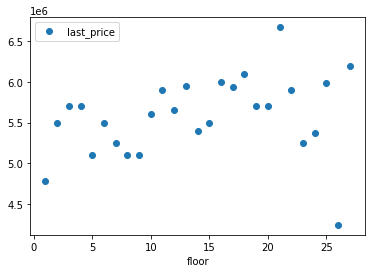

In [72]:
data_date.plot(x = 'floor', y = 'last_price', style = 'o')

In [73]:
data_date.corr()

floor  last_price
floor        1.00        0.27
last_price   0.27        1.00

<div class = "alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<h3>Комментарий студента</h3>
<br>
    Изначально линейная зависимость стоимости аппартаментов от расположения этажа в здании не имеется, из-за хаотичного расположения точек зависимости цены на недвижимость от близости центра города (т.е. значение корреляции приблизительно равна нулю), но после удаления 10-ти миллионых значений строки 'last_price' и располежения аппартаментов ниже 10-го этажа (строка 'floor'), не совсем, но более-менее чёткая линейная зависимость цен на недвижимость от расположения этажа имеется (всё же из-за резкого роста значения корреляции). 
</div>

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>И в конце изучим зависимость стоимость недвижимости от параметров даты размещения: дня недели, месяца и года, но для сначала выберем для более корректных статистических расчётов: числовые значения для номера дня недели и месяца вместо их названий.<br>    
</div>

In [74]:
data_weekday = data.pivot_table(index=['num_weekday'], values=['last_price'], aggfunc='median').sort_values(by=['num_weekday'])                                      
data_weekday

last_price
num_weekday             
0           5,400,000.00
1           5,400,000.00
2           5,400,000.00
3           5,500,000.00
4           5,300,000.00
5           5,250,000.00
6           5,200,000.00

In [75]:
data_month = data.pivot_table(index=['num_month'], values=['last_price'], aggfunc='median').sort_values(by=['num_month'])                   
data_month

last_price
num_month             
1         5,550,000.00
2         5,397,500.00
3         5,300,000.00
4         5,450,000.00
5         5,425,000.00
6         5,200,000.00
7         5,395,000.00
8         5,350,000.00
9         5,400,000.00
10        5,200,000.00
11        5,400,000.00
12        5,900,000.00

In [76]:
data_year = data.pivot_table(index=['year'], values=['last_price'], aggfunc='median').sort_values(by=['year'])                   
data_year

last_price
year              
2014 10,487,000.00
2015  6,300,000.00
2016  5,500,000.00
2017  5,200,000.00
2018  5,200,000.00
2019  5,600,000.00

In [77]:
data_weekday = data_weekday.reset_index(level=0)

In [78]:
data_month = data_month.reset_index(level=0)

In [79]:
data_year = data_year.reset_index(level=0)

<AxesSubplot:xlabel='num_weekday'>

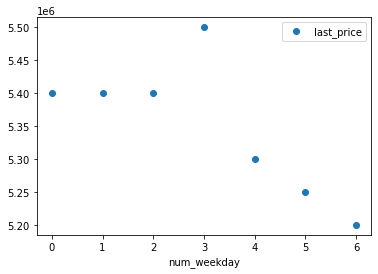

In [80]:
data_weekday.plot(x = 'num_weekday', y = 'last_price', style = 'o')

<AxesSubplot:xlabel='num_month'>

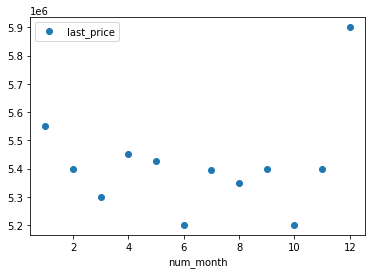

In [81]:
data_month.plot(x = 'num_month', y = 'last_price', style = 'o')

<AxesSubplot:xlabel='year'>

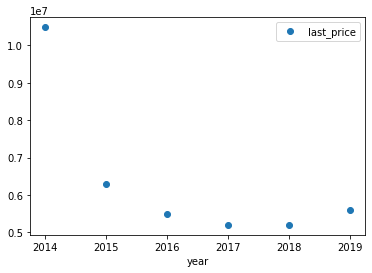

In [82]:
data_year.plot(x = 'year', y = 'last_price', style = 'o')

In [83]:
data_weekday.corr()

num_weekday  last_price
num_weekday         1.00       -0.74
last_price         -0.74        1.00

In [84]:
data_month.corr()

num_month  last_price
num_month        1.00        0.20
last_price       0.20        1.00

In [85]:
data_year.corr()

year  last_price
year        1.00       -0.73
last_price -0.73        1.00

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>Судя по значениям точечных графиков нужно отбросить для зависимости стоимости жилья от дня недели ('num_weekday') значения свыше 5 миллионов 450 тысяч рублей, от месяца ('num_month') - свыше 5 миллионов 500 тысяч рублей и года ('year') - свыше 7 миллионов рублей.<br>
</div>

In [86]:
data_weekday = data_weekday.query('last_price <= 5.45 * 10**6')

In [87]:
data_month = data_month.query('last_price <= 5.5 * 10**6')

In [88]:
data_year = data_year.query('last_price <= 7* 10**6')

<AxesSubplot:xlabel='num_weekday'>

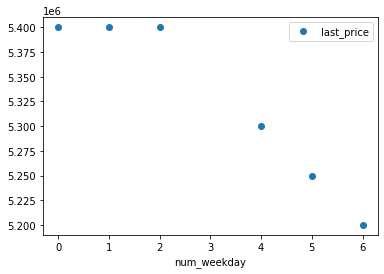

In [89]:
data_weekday.plot(x = 'num_weekday', y = 'last_price', style = 'o')

<AxesSubplot:xlabel='num_month'>

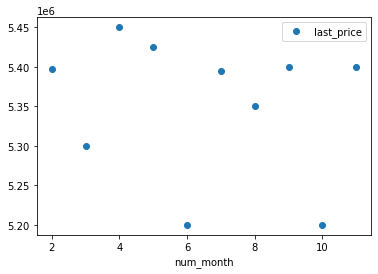

In [90]:
data_month.plot(x = 'num_month', y = 'last_price', style = 'o')

<AxesSubplot:xlabel='year'>

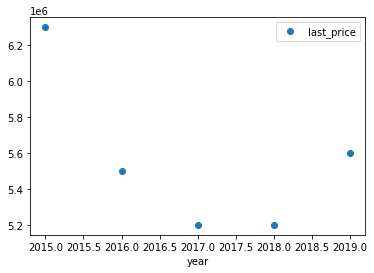

In [91]:
data_year.plot(x = 'year', y = 'last_price', style = 'o')

In [92]:
data_weekday.corr()

num_weekday  last_price
num_weekday         1.00       -0.96
last_price         -0.96        1.00

In [93]:
data_month.corr()

num_month  last_price
num_month        1.00       -0.20
last_price      -0.20        1.00

In [94]:
data_year.corr()

year  last_price
year        1.00       -0.60
last_price -0.60        1.00

<div class = "alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<h3>Комментарий студента</h3>
<br>  
    Судя по анализу зависимости и по графикам стоимости жилья от дня недели ('num_weekday'), месяца ('num_month') и года ('year'): 
    <ul>
        <li>линейная зависмость более-менее хорошо отображена только в зависимости от дня недели, где к началу месяца выставляются самые дорогие аппартаменты (из-за этого значение корреляции уменьшается)</li><br> 
        <li>самая неявная зависимость была обнаружена в зависимости от числа месяца, вскоре из-за не слишком высокого значения -0.20, которая и так после обработки уменьшила своё значение с положительного значения на отрицательное и график приобрёл виде обратно пропорциональной зависимости от названия месяца (т.е. в июне и в ноябре жильё имееются больше объявлений о самом дешёвом жильё)</li><br> 
        <li>но рост корреляционного значения наблюдается из-за зависимости от года, но зависимость времени года от цены на жильё больше похоже на квадратиченую зависимость, чем на линейную, на в 2017-2018 годах аппартаменты можно было купить дешевле, чем в 2015 году, но цены в 2019 году немного подросли на уровне 2016 года.</li><br> 
    </ul>    
</div>

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>А теперь посмотрим статистику средней цены на жильё по всем представленными населёнными пунктами Санкт-Петербурга и Ленинградской области. Сначала выберем 10 населённых пунктов с наибольшим количеством объявлений с помощью функций, сохраняя в переменной data_locality_name: 
    <ul>
        <li>группировки населённых пунктов (.groupby())</li><br> 
        <li>агрегации действий над строками (в данном случае операция подсчёта строк по данным условиям из значений группировок строк из индекса, полученной из метода .groupby()), взятой отдельными столбцами, с помощью .agg(название_столбца, 'count'))</li><br>
        <li>переименование единственного столбца вне индекса на значение 'locality_name_count' (.rename())</li><br>
        <li>сортировка по убыванию столбца 'locality_name_count' (.sort_values(by=название_столбца, ascending=False))</li><br> 
        <li>воспроизведение только первых десяти строк (.head(10))</li>         
    </ul>   
</div>

In [95]:
data_locality_name = data.groupby('locality_name').agg({'locality_name': 'count'}).rename(columns={'locality_name':'locality_name_count'}).sort_values(by='locality_name_count', ascending=False).head(10)
display(data_locality_name)

locality_name_count
locality_name                         
Санкт-Петербург                   9529
Пушкин                             222
поселок Шушары                     205
Колпино                            197
Петергоф                           142
поселок Парголово                  134
Сестрорецк                         120
Красное Село                       105
Ломоносов                           89
Кронштадт                           61

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>
    Для демонстрации выведем все строки индексов в таблице data_locality_name, получим таблицу data_result, где содержатся все строки, где есть значения в столбце 'locality_name', как в индексных значениях стро в таблице data_locality_name и посчитаем количество строк в этой таблице.  
</div>

In [96]:
data_locality_name.index

Index(['Санкт-Петербург', 'Пушкин', 'поселок Шушары', 'Колпино', 'Петергоф',
       'поселок Парголово', 'Сестрорецк', 'Красное Село', 'Ломоносов',
       'Кронштадт'],
      dtype='object', name='locality_name')

In [97]:
data_result = data[data['locality_name'].isin(data_locality_name.index)]
data_result.head(10)

total_images    last_price  total_area first_day_exposition  rooms  \
0             20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
4              2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
9             18  5,400,000.00       61.00  2017-02-26T00:00:00      3   
10             5  5,050,000.00       39.60  2017-11-16T00:00:00      1   
13            20  3,550,000.00       42.80  2017-07-01T00:00:00      2   
16            11  6,700,000.00       82.00  2017-11-23T00:00:00      3   
18             8  3,250,000.00       31.00  2017-01-27T00:00:00      1   
19            16 14,200,000.00      121.00  2019-01-09T00:00:00      3   
20            12  6,120,000.00       80.00  2017-09-28T00:00:00      3   
23            11  2,950,000.00       32.00  2016-10-29T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70            16        51.00      8        False   False   
4             3.03            14        32.00     13        False   False   
9             2.50             9        43.60      7        False   False   
10            2.67            12        20.30      3        False   False   
13            2.56             5        27.00      5        False   False   
16            3.05             5        55.60      1        False   False   
18            2.50             5        19.40      2        False   False   
19            2.75            16        76.00      8        False   False   
20            2.70            27        48.00     11        False   False   
23            2.60             9        17.70      9        False   False   

    open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
0       False         25.00        0    Санкт-Петербург         18,863.00   
4       False         41.00        0    Санкт-Петербург         31,856.00   
9       False          6.50        2    Санкт-Петербург         50,898.00   
10      False          8.50        0    Санкт-Петербург         38,357.00   
13      False          5.20        1           Петергоф         37,868.00   
16      False          9.00        0    Санкт-Петербург         22,108.00   
18      False          5.60        1    Санкт-Петербург         44,060.00   
19      False         12.00        0    Санкт-Петербург         38,900.00   
20      False         12.00        2  поселок Парголово         53,134.00   
23      False          6.10        0    Санкт-Петербург         15,414.00   

    city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16,028.00              1.00         482.00              2.00   
4               8,098.00              2.00         112.00              1.00   
9              15,008.00              0.00           0.00              0.00   
10             13,878.00              1.00         310.00              2.00   
13             33,058.00              1.00         294.00              3.00   
16             10,698.00              3.00         420.00              0.00   
18             10,842.00              1.00         759.00              0.00   
19             12,843.00              0.00           0.00              0.00   
20             19,311.00              0.00           0.00              0.00   
23             14,211.00              2.00         517.00              1.00   

    ponds_nearest  days_exposition  price_sqmetr  num_weekday  num_month  \
0          755.00               95    120,370.37            3          3   
4           48.00              121    100,000.00            1          6   
9            0.00              289     88,524.59            6          2   
10         553.00              137    127,525.25            3         11   
13         298.00              366     82,943.93            5          7   
16           0.00              397     81,707.32            3         11   
18           0.00              168    104,838.71            4          1   
19           0.

In [98]:
print(f'Количество строк в таблице, в котором содержатся названия Санкт-Петербурга и населённых пунктов Ленинградской области - {data_result.shape[0]} строк.')

Количество строк в таблице, в котором содержатся названия Санкт-Петербурга и населённых пунктов Ленинградской области - 10804 строк.


<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>
    На примере создания таблицы data_locality_name, подобным образом для вывода самых высоких значений среднего значения стоимости квадратного метра, самых дорогих и дешёвых квартир в каждом из 10-ти городов Санкт-Петербурга и Ленинградской области.   
</div>

In [99]:
data_mean = data_result.groupby('locality_name').agg({'price_sqmetr': 'mean'}).rename(columns={'price_sqmetr':'price_sqmetr_mean'}).sort_values(by='price_sqmetr_mean', ascending=False).head(10)
data_mean.head(10)

price_sqmetr_mean
locality_name                       
Санкт-Петербург           114,894.67
Пушкин                    103,779.91
Сестрорецк                102,199.64
поселок Парголово          90,939.08
Петергоф                   85,228.16
Кронштадт                  79,784.03
поселок Шушары             79,140.96
Колпино                    75,891.55
Ломоносов                  74,250.29
Красное Село               73,221.02

In [100]:
data_locality_name_max = data.groupby('locality_name').agg({'last_price': 'max'}).rename(columns={'last_price': 'last_price_max'}).sort_values(by='last_price_max', ascending=False).head(10)
display(data_locality_name_max)

last_price_max
locality_name                          
Санкт-Петербург          420,000,000.00
Пушкин                    29,500,000.00
поселок Репино            28,000,000.00
Зеленогорск               23,000,000.00
Петергоф                  22,000,000.00
Сестрорецк                18,000,000.00
Кронштадт                 17,630,000.00
поселок Александровская   13,700,000.00
поселок Стрельна          12,990,000.00
Колпино                   12,750,000.00

In [101]:
data_locality_name_min = data.groupby('locality_name').agg({'last_price': 'min'}).rename(columns={'last_price': 'last_price_min'}).sort_values(by='last_price_min').head(10)
display(data_locality_name_min)

last_price_min
locality_name                    
Санкт-Петербург         12,190.00
поселок Шушары       1,500,000.00
Ломоносов            1,650,000.00
Красное Село         1,799,000.00
поселок Понтонный    1,980,000.00
Павловск             2,099,000.00
Колпино              2,100,000.00
Петергоф             2,100,000.00
Пушкин               2,200,000.00
Кронштадт            2,290,000.00

<div class = "alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<h3>Комментарий студента</h3>
<br>  
    <i>Вывод:</i> неудивительно, что по всем параметрам, таким как: наибольшее количество объявлений (взяв первые 10 значений в этих населённых пунктах), среднюю цену квадратного метра, самую высокую и, как удивительно, самую низкую стоимость жилья из этих населённых пунктах составляет в г.Санкт-Петербурге.  
</div>

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>
    Теперь изучим предложения квартиры зависимости от расстояния до центра г.Санкт-Петербурга. Сначала выделим только те строки, где столбце 'locality_name' указан, город Санкт-Петербург. Затем, в столбце 'city_centers_nearest', преобразуем расстояние до центра гороода в целых числах километрах, т.е. разделим значения в 1000 раз и, с помощью метода .astype(int) пребразуем в целые значения). Также, обязательно, в целях исключения путаницы сохраним значения в столбце 'city_centers_nearest_km', а предыдущие значения в столбце 'city_centers_nearest' удалим. 
</div>

In [102]:
data_Saint_Peterburg = data[data['locality_name'] == 'Санкт-Петербург']
data_Saint_Peterburg.head(30)

total_images    last_price  total_area first_day_exposition  rooms  \
0             20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
4              2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
9             18  5,400,000.00       61.00  2017-02-26T00:00:00      3   
10             5  5,050,000.00       39.60  2017-11-16T00:00:00      1   
16            11  6,700,000.00       82.00  2017-11-23T00:00:00      3   
18             8  3,250,000.00       31.00  2017-01-27T00:00:00      1   
19            16 14,200,000.00      121.00  2019-01-09T00:00:00      3   
23            11  2,950,000.00       32.00  2016-10-29T00:00:00      1   
25             3  6,800,000.00       76.00  2015-10-01T00:00:00      2   
27            20  7,100,000.00       70.00  2017-05-12T00:00:00      3   
31             8  7,200,000.00       67.90  2017-10-26T00:00:00      2   
34             3  3,290,000.00       33.00  2018-02-04T00:00:00      1   
39            15  5,200,000.00       54.40  2018-11-29T00:00:00      2   
43            13  9,330,000.00       48.00  2017-01-10T00:00:00      2   
45            17  5,200,000.00       50.60  2018-12-02T00:00:00      2   
46            17  6,600,000.00       52.10  2019-01-31T00:00:00      2   
49             1  3,050,000.00       30.80  2018-11-22T00:00:00      1   
51             7 45,000,000.00      161.00  2017-10-17T00:00:00      3   
52            20 11,795,000.00      136.00  2017-09-22T00:00:00      6   
55            20  7,400,000.00       58.80  2018-03-24T00:00:00      2   
56            14  4,350,000.00       41.00  2016-03-28T00:00:00      1   
58            11  3,900,000.00       33.00  2017-07-05T00:00:00      1   
63             2 20,000,000.00      118.00  2018-09-11T00:00:00      3   
65             7  4,400,000.00       57.00  2018-03-03T00:00:00      3   
71            20  4,850,000.00       57.50  2019-03-27T00:00:00      3   
75            19  4,950,000.00       44.00  2018-02-27T00:00:00      2   
77             7  4,300,000.00       62.10  2016-03-13T00:00:00      3   
85            13  5,200,000.00       46.30  2018-11-26T00:00:00      2   
87            19  4,999,000.00       52.00  2019-04-23T00:00:00      2   
93            10  3,500,000.00       40.40  2016-06-15T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70            16        51.00      8        False   False   
4             3.03            14        32.00     13        False   False   
9             2.50             9        43.60      7        False   False   
10            2.67            12        20.30      3        False   False   
16            3.05             5        55.60      1        False   False   
18            2.50             5        19.40      2        False   False   
19            2.75            16        76.00      8        False   False   
23            2.60             9        17.70      9        False   False   
25            2.75            23        39.00     18        False   False   
27            2.60            17        49.00     11        False   False   
31            2.80            16        38.10      4        False   False   
34            2.55            16        14.00      3        False   False   
39            2.75             9        29.70      2        False   False   
43            3.00             4        28.00      4        False   False   
45            2.65             9        30.30      7        False   False   
46            2.60            24        29.70      9        False   False   
49            2.50             9        18.00      7        False   False   
51            3.20             8        38.00      4        False   False   
52            3.00             2        94.00      2        False   False   
55            2.60            10        33.70      9        False   False   
56            2.80             7        18.10      4        False   False   
58            2

In [103]:
data_Saint_Peterburg['city_centers_nearest_km'] = (data_Saint_Peterburg['city_centers_nearest'] / 1000).astype(int)
data_Saint_Peterburg.pop('city_centers_nearest')
data_Saint_Peterburg.head(30)

C:\Users\Michael\AppData\Local\Temp/ipykernel_12532/186534619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Saint_Peterburg['city_centers_nearest_km'] = (data_Saint_Peterburg['city_centers_nearest'] / 1000).astype(int)


total_images    last_price  total_area first_day_exposition  rooms  \
0             20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
4              2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
9             18  5,400,000.00       61.00  2017-02-26T00:00:00      3   
10             5  5,050,000.00       39.60  2017-11-16T00:00:00      1   
16            11  6,700,000.00       82.00  2017-11-23T00:00:00      3   
18             8  3,250,000.00       31.00  2017-01-27T00:00:00      1   
19            16 14,200,000.00      121.00  2019-01-09T00:00:00      3   
23            11  2,950,000.00       32.00  2016-10-29T00:00:00      1   
25             3  6,800,000.00       76.00  2015-10-01T00:00:00      2   
27            20  7,100,000.00       70.00  2017-05-12T00:00:00      3   
31             8  7,200,000.00       67.90  2017-10-26T00:00:00      2   
34             3  3,290,000.00       33.00  2018-02-04T00:00:00      1   
39            15  5,200,000.00       54.40  2018-11-29T00:00:00      2   
43            13  9,330,000.00       48.00  2017-01-10T00:00:00      2   
45            17  5,200,000.00       50.60  2018-12-02T00:00:00      2   
46            17  6,600,000.00       52.10  2019-01-31T00:00:00      2   
49             1  3,050,000.00       30.80  2018-11-22T00:00:00      1   
51             7 45,000,000.00      161.00  2017-10-17T00:00:00      3   
52            20 11,795,000.00      136.00  2017-09-22T00:00:00      6   
55            20  7,400,000.00       58.80  2018-03-24T00:00:00      2   
56            14  4,350,000.00       41.00  2016-03-28T00:00:00      1   
58            11  3,900,000.00       33.00  2017-07-05T00:00:00      1   
63             2 20,000,000.00      118.00  2018-09-11T00:00:00      3   
65             7  4,400,000.00       57.00  2018-03-03T00:00:00      3   
71            20  4,850,000.00       57.50  2019-03-27T00:00:00      3   
75            19  4,950,000.00       44.00  2018-02-27T00:00:00      2   
77             7  4,300,000.00       62.10  2016-03-13T00:00:00      3   
85            13  5,200,000.00       46.30  2018-11-26T00:00:00      2   
87            19  4,999,000.00       52.00  2019-04-23T00:00:00      2   
93            10  3,500,000.00       40.40  2016-06-15T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70            16        51.00      8        False   False   
4             3.03            14        32.00     13        False   False   
9             2.50             9        43.60      7        False   False   
10            2.67            12        20.30      3        False   False   
16            3.05             5        55.60      1        False   False   
18            2.50             5        19.40      2        False   False   
19            2.75            16        76.00      8        False   False   
23            2.60             9        17.70      9        False   False   
25            2.75            23        39.00     18        False   False   
27            2.60            17        49.00     11        False   False   
31            2.80            16        38.10      4        False   False   
34            2.55            16        14.00      3        False   False   
39            2.75             9        29.70      2        False   False   
43            3.00             4        28.00      4        False   False   
45            2.65             9        30.30      7        False   False   
46            2.60            24        29.70      9        False   False   
49            2.50             9        18.00      7        False   False   
51            3.20             8        38.00      4        False   False   
52            3.00             2        94.00      2        False   False   
55            2.60            10        33.70      9        False   False   
56            2.80             7        18.10      4        False   False   
58            2

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>
    Теперь изучим предложения квартиры зависимости от расстояния до центра г.Санкт-Петербурга, с помощью группировки по столбцу 'city_centers_nearest_km', вычисления в столбце 'price_sqmetr' средней цены квадратного метра, в зависимости от центра города (в километрах) и переименовывания столбца из 'price_sqmetr' в 'price_sqmetr_mean'. Затем преобразуем столбцы 'city_centers_nearest_km' из индексных значений в обычные значения для построения графика средней цены за квадратный метр 'price_sqmetr_mean' от расстояния до центра города 'city_centers_nearest_km'.  
    
</div>

In [104]:
data_centers_mean = data_Saint_Peterburg.groupby('city_centers_nearest_km').agg({'price_sqmetr': 'mean'}).rename(columns={'price_sqmetr':'price_sqmetr_mean'})
data_centers_mean

price_sqmetr_mean
city_centers_nearest_km                   
0                               166,132.98
1                               167,274.97
2                               148,760.02
3                               124,871.80
4                               134,895.27
5                               143,551.48
6                               156,199.70
7                               137,752.67
8                               123,583.42
9                               111,860.26
10                              112,438.57
11                              107,189.47
12                              109,094.18
13                              107,175.59
14                              104,761.07
15                              103,604.03
16                              100,102.55
17                               93,875.75
18                               95,125.67
19                               94,046.36
20                              105,935.29
21                               90,565.08
22                               92,097.15
23                               95,314.67
24                               87,671.33
25                               86,160.23
26                               84,497.00
27                              193,918.92
28                               80,171.88
29                               62,482.40

In [105]:
data_centers_mean = data_centers_mean.reset_index(level=0)

<AxesSubplot:xlabel='city_centers_nearest_km'>

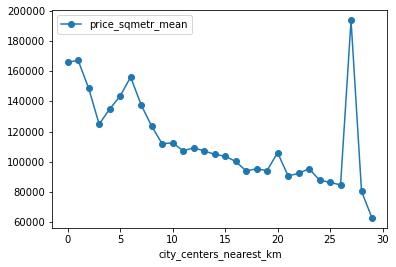

In [106]:
data_centers_mean.plot(x = 'city_centers_nearest_km', y = 'price_sqmetr_mean', style = 'o-')

<div class = "alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<h3>Комментарий студента</h3>
<br>  
    <i>Вывод:</i>В целом чем дальше аппартаменты от центра города, тем меньше цена за квадратный метр в аппартаментах г.Санкт-Петербурга. Рост цены квадратного метра от расстояние от центра города наблюдаются, в следующих факторах: от центра города и до 1 километров, от 3 и до 6 километров, от 19 до 20 километров, от 21 до 23 километров, от 26 до 27 километров (это самое сильное изменение графика функции). В остальных участках график уменьшается, помимо этого особо сильное понижение цены за квадратный метр наблюдается на участке от 27 до 28 километров. Как ни парадоксально, но на 27 километре от центра самые высокие цены на апартаменты от центра города.<br> 
<br> Центральной зоной обозначим границу от 3 и до 6 километров и от 26 до 27 километров от центра города, так как при условии обратной линейной зависимости  стоимости жилья от расположения до центра<br>     
</div>

<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>
    И в конце анализа о продаже аппартаментов в г.Санкт-Петербурге выделим определённый сегмент квартир в его центре (т.е. где значения с столбце 'city_centers_nearest_km' в  в диапозоне от 3 и до 6 километров и от 26 до 27 километров от центра города), а также посчитаем количество соответствующих строк. <br> 
</div>

In [107]:
data_Saint_Peterburg = data_Saint_Peterburg.query('(city_centers_nearest_km >= 3 and city_centers_nearest_km <= 6) or (city_centers_nearest_km >= 26 and city_centers_nearest_km <= 27)')  
data_Saint_Peterburg.head(300)

total_images     last_price  total_area first_day_exposition  rooms  \
51               7  45,000,000.00      161.00  2017-10-17T00:00:00      3   
52              20  11,795,000.00      136.00  2017-09-22T00:00:00      6   
63               2  20,000,000.00      118.00  2018-09-11T00:00:00      3   
106              9  10,500,000.00      124.10  2017-05-25T00:00:00      5   
114              5   4,000,000.00       21.40  2019-02-07T00:00:00      1   
121             20  33,000,000.00      180.00  2017-02-17T00:00:00      3   
136             16   6,500,000.00       51.80  2018-08-01T00:00:00      2   
137             11  13,310,800.00       85.10  2018-01-01T00:00:00      2   
143              9   2,990,000.00       30.00  2016-06-08T00:00:00      1   
147             10  27,700,000.00      179.60  2017-07-06T00:00:00      5   
154              1   8,200,000.00       80.00  2018-11-06T00:00:00      3   
159             14   7,050,000.00       66.00  2017-09-04T00:00:00      3   
181              2   7,900,000.00       71.80  2017-08-23T00:00:00      3   
201              5  10,880,000.00      123.10  2015-11-12T00:00:00      6   
206             16   5,080,000.00       31.30  2019-04-23T00:00:00      1   
263             12  39,900,000.00      140.60  2016-11-19T00:00:00      2   
291             10   5,900,000.00       70.00  2017-01-24T00:00:00      3   
318             12   9,990,000.00       67.00  2017-07-10T00:00:00      1   
323              6   9,591,727.00       72.00  2017-06-29T00:00:00      2   
335              1  21,800,000.00      163.40  2017-12-10T00:00:00      5   
344             18   6,200,000.00       46.90  2018-07-30T00:00:00      2   
351             16   8,350,000.00       87.10  2019-02-20T00:00:00      3   
357              4   8,560,000.00       65.70  2017-11-10T00:00:00      2   
359             13   7,000,000.00       83.10  2018-08-07T00:00:00      4   
368             19  12,500,000.00       85.00  2018-09-21T00:00:00      3   
463              1   5,150,000.00       50.00  2016-07-02T00:00:00      2   
464             15  66,571,000.00      280.30  2015-06-11T00:00:00      6   
481              5   6,300,000.00       46.50  2018-01-03T00:00:00      1   
483             14  10,000,000.00       70.00  2018-02-21T00:00:00      2   
496             11  13,460,000.00      136.20  2019-02-27T00:00:00      4   
547             13   8,000,000.00       71.70  2017-05-14T00:00:00      3   
559             10   8,100,000.00       70.80  2015-02-11T00:00:00      3   
574              1  15,300,000.00      113.10  2016-02-02T00:00:00      2   
647              8   5,250,000.00       59.00  2019-05-01T00:00:00      3   
648              3  17,500,000.00      183.70  2018-07-01T00:00:00     11   
649              1   7,210,000.00       61.50  2018-10-02T00:00:00      3   
652             15  25,500,000.00      113.00  2018-03-26T00:00:00      2   
658             16  11,200,000.00      131.50  2015-11-02T00:00:00      4   
661             18   7,200,000.00       69.75  2017-11-10T00:00:00      3   
674             11  50,000,000.00      131.10  2019-02-11T00:00:00      4   
704              8  10,600,000.00      141.00  2015-12-17T00:00:00      4   
714              7   6,204,472.00       50.50  2015-09-20T00:00:00      1   
723              9   5,850,000.00       81.00  2018-05-04T00:00:00      2   
748             13  14,350,000.00       74.00  2017-11-28T00:00:00      2   
779             18   5,100,000.00       40.40  2018-10-13T00:00:00      1   
797              1   7,500,800.00      105.20  2017-09-08T00:00:00      3   
807             14  18,777,000.00      181.50  2018-07-25T00:00:00      6   
817             10  19,800,000.00       99.20  2018-04-06T00:00:00      3   
824             20  46,950,000.00      165.00  2018-11-06T00:00:00      5   
857             14   8,260,000.00       91.00  2018-03-29T00:00:00      4   
870             11   5,890,000.00       65.00  2015-11-18T00:00:00      3   
87

In [108]:
print(f'Количество строк в таблице в определённом сегменте аппартаментов в Санкт-Петербурге - {data_Saint_Peterburg.shape[0]}.')

Количество строк в таблице в определённом сегменте аппартаментов в Санкт-Петербурге - 1587.


<div class="alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента:</h3>
<br>
    На примере создания таблицы data_locality_name, подобным образом выведем сначала выведем количество аппартаментов (можно вывести из любого столбца) в порядке группировок по удалённости от центра в заданном сегменте (в диапозоне от 3 до 6 и от 26 до 27 километров), а потом 
    самые высоких значений среднего значения стоимости квадратного метра, самых дорогих и дешёвых квартир в каждом из 10-ти городов Санкт-Петербурга и Ленинградской области. <br> 
    
<br><br>
</div>

In [109]:
data_centers_count_Saint_Peterburg = data_Saint_Peterburg.groupby('city_centers_nearest_km').agg({'total_area': 'count'}).rename(columns={'total_area':'count'}) #.rename(columns={'price_sqmetr':'price_sqmetr_mean'})  .agg({'city_centers_nearest_km': 'count'}) #['total_area', 'last_price', 'rooms', 'ceiling_height']#.agg({'price_sqmetr': 'mean'}).rename(columns={'price_sqmetr':'price_sqmetr_mean'})
data_centers_count_Saint_Peterburg

count
city_centers_nearest_km       
3                          333
4                          540
5                          437
6                          274
26                           2
27                           1

In [110]:
#data_rooms_Saint_Peterburg = data_Saint_Peterburg.groupby(city_centers_nearest_km').agg({'rooms': 'mean'}).rename(columns={'rooms':'rooms_mean'}).sort_values(by='rooms_mean', ascending=False)
data_rooms_Saint_Peterburg = data_Saint_Peterburg.groupby('city_centers_nearest_km')['rooms'].describe()
data_rooms_Saint_Peterburg

count  mean  std  min  25%  50%  75%   max
city_centers_nearest_km                                            
3                       333.00  3.04 1.46 0.00 2.00 3.00 4.00 11.00
4                       540.00  3.06 1.58 0.00 2.00 3.00 4.00 16.00
5                       437.00  2.82 1.48 0.00 2.00 3.00 3.00  9.00
6                       274.00  2.43 1.12 0.00 2.00 2.00 3.00  7.00
26                        2.00  2.00 1.41 1.00 1.50 2.00 2.50  3.00
27                        1.00  2.00  NaN 2.00 2.00 2.00 2.00  2.00

In [111]:
data_rooms_Saint_Peterburg = data_rooms_Saint_Peterburg.reset_index(level=0)

NameError: name 'data_centers_Saint_Peterburg' is not defined

In [ ]:
data_rooms_Saint_Peterburg.plot(x = 'city_centers_nearest_km', y = 'mean', style = 'o-')

In [ ]:
#data_rooms_Saint_Peterburg = data_Saint_Peterburg.groupby(city_centers_nearest_km').agg({'rooms': 'mean'}).rename(columns={'rooms':'rooms_mean'}).sort_values(by='rooms_mean', ascending=False)
data_floor_Saint_Peterburg = data_Saint_Peterburg.groupby('city_centers_nearest_km')['floor'].describe()
data_floor_Saint_Peterburg

In [ ]:
data_floor_Saint_Peterburg = data_floor_Saint_Peterburg.reset_index(level=0)

In [ ]:
data_floor_Saint_Peterburg.plot(x = 'city_centers_nearest_km', y = 'mean', style = 'o-')

In [ ]:
#data_rooms_Saint_Peterburg = data_Saint_Peterburg.groupby(city_centers_nearest_km').agg({'rooms': 'mean'}).rename(columns={'rooms':'rooms_mean'}).sort_values(by='rooms_mean', ascending=False)
data_rooms_Saint_Peterburg = data_Saint_Peterburg.groupby('city_centers_nearest_km')['rooms'].describe()
data_rooms_Saint_Peterburg

In [ ]:
data_centers_Saint_Peterburg.plot(x = 'city_centers_nearest_km', y = 'mean', style = 'o-')

In [ ]:
#data_rooms_Saint_Peterburg = data_Saint_Peterburg.groupby(city_centers_nearest_km').agg({'rooms': 'mean'}).rename(columns={'rooms':'rooms_mean'}).sort_values(by='rooms_mean', ascending=False)
data_rooms_Saint_Peterburg = data_Saint_Peterburg.groupby('city_centers_nearest_km')['rooms'].describe()
data_rooms_Saint_Peterburg

In [ ]:
data_centers_Saint_Peterburg.plot(x = 'city_centers_nearest_km', y = 'mean', style = 'o-')

## 1 Общий вывод: